In [1]:
#let us import all the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import pi
import cv2
import scipy.misc
import tensorflow as tf

/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [2]:
DATA_FOLDER = "driving_dataset/"
DATA_FILE = os.path.join(DATA_FOLDER, "data.txt")

x = []
y = []

train_batch_pointer = 0
test_batch_pointer = 0

In [3]:
with open(DATA_FILE) as f:
    for line in f:
        image_name, angle = line.split()
        
        image_path = os.path.join(DATA_FOLDER, image_name)
        x.append(image_path)
        
        angle_radians = float(angle) * (pi / 180)  #converting angle into radians
        y.append(angle_radians)
y = np.array(y)
print(str(len(x))+" "+str(len(y)))

45406 45406


### Splitting train and test data (70:30)

In [4]:
#using 70-30 split of train and test data
split_ratio = int(len(x) * 0.7)

train_x = x[:split_ratio]
train_y = y[:split_ratio]

test_x = x[split_ratio:]
test_y = y[split_ratio:]

print("Split ratio")
print('-'*50)
print('Train dataset:',len(train_x)/len(x)*100,'%\n','size:',len(train_x))

print('Test dataset:',len(test_x)/len(x)*100,'%\n','size:',len(test_x))

Split ratio
--------------------------------------------------
Train dataset: 69.9995595295776 %
 size: 31784
Test dataset: 30.00044047042241 %
 size: 13622


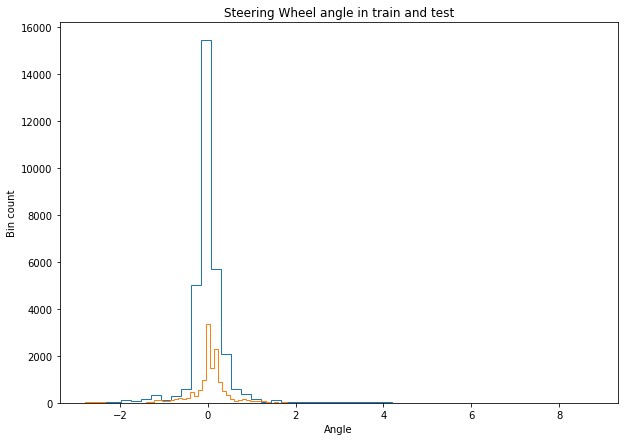

In [5]:
#distrubution of steer angle parameter in train and test
fig = plt.figure(figsize = (10, 7))
plt.hist(train_y, bins = 50, histtype = "step")
plt.hist(test_y, bins = 50, histtype = "step")   #test-orange
plt.title("Steering Wheel angle in train and test")
plt.xlabel("Angle")
plt.ylabel("Bin count")
plt.show()

Most of the steering angle values are 0,indicating that the car has been driving mostly on straight roads rather than curvy roads. 

### Architecture of the train model

In [6]:
# from driving_data.py

In [6]:
def loadTrainBatch(batch_size):
    global train_batch_pointer
    x_result = []
    y_result = []
    for i in range(batch_size):
        read_image = cv2.imread(train_x[(train_batch_pointer + i) % len(train_x)]) 
        read_image_road = read_image[-150:] 
        read_image_resize = cv2.resize(read_image_road, (200, 66)) 
        read_image_final = read_image_resize/255.0  
        
        x_result.append(read_image_final) 
        
        y_result.append(train_y[(train_batch_pointer + i) % len(train_y)])
        
    train_batch_pointer += batch_size
        
    return x_result, y_result

In [7]:
def loadTestBatch(batch_size):
    global test_batch_pointer
    x_result = []
    y_result = []
    for i in range(batch_size):
        read_image = cv2.imread(test_x[(test_batch_pointer + i) % len(test_x)]) 
        read_image_road = read_image[-150:] 
        read_image_resize = cv2.resize(read_image_road, (200, 66)) 
        read_image_final = read_image_resize/255.0
        x_result.append(read_image_final) 
        
        y_result.append(test_y[(test_batch_pointer + i) % len(test_y)]) 
        
    test_batch_pointer += batch_size
        
    return x_result, y_result

In [9]:
## from model.py

In [8]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape = shape, stddev = 0.1)
    return tf.Variable(initial) 

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(previous_input, filter_input, strides,name):
    print(name,filter_input.shape,filter_input.shape[-1])
    return tf.nn.conv2d(previous_input, filter_input, strides = [1, strides, strides, 1], padding = "VALID")


# def Dense(X, size, name):
#     w = weight_variable(shape=size)
#     b = weight_variable(shape=[size[-1]])
    
#     dense = tf.matmul(X, w) + b
#     print(name, size, size[-1])
#     ## Applying activation

    
#     h_fc = tf.nn.relu(dense)
    
    
#     return h_fc


# def flatten(X, size):
#     return tf.reshape(X, [-1, size])

In [9]:
x_input = tf.placeholder(tf.float32, shape = [None, 66, 200, 3], name = "Plc_1")
y_true = tf.placeholder(tf.float32,  name = "Plc_2")

input_image = x_input
#keep_prob = tf.placeholder(tf.float32)
# # Flatten layer

# h_conv5_flatten = flatten(Conv5, size=1152)


# # Dense layer 1
# h_fc1 = Dense(h_conv5_flatten, (1152, 1164), name='dense1')
# # Dropout 1
# h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# # Dense Layer 2
# h_fc2 = Dense(h_fc1_drop, (1164, 100), name='dense2')
# # Dropout 2
# h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

# # Dense Layer 3
# h_fc3 = Dense(h_fc2_drop, (100, 50), name='dense3')
# # Dropout 3
# h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

# # Dense Layer 4
# h_fc4 = Dense(h_fc3_drop, (50, 10), name='dense4')

# # Dropout 4
# h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)


# # Output
# W_fc5 = weight_variable(shape = [10, 1])
# b_fc5 = bias_variable(shape = [1])
# y = tf.matmul(h_fc4_drop, W_fc5) + b_fc5

### using linear output tf.matmul() instead of atan in the output

In [10]:
#Convolution Layers
#First convolution layer
W_Conv1 = weight_variable([5,5,3,24])
B_Conv1 = bias_variable([24])
Conv1 = tf.nn.elu(conv2d(input_image, W_Conv1, 2,name='conv2d_1') + B_Conv1)
#tf.nn.conv2d(previous_input, filter_input, strides = [1, strides, strides, 1], padding = "VALID")

#Second convolution layer
W_Conv2 = weight_variable([5,5,24,36])
B_Conv2 = bias_variable([36])
Conv2 = tf.nn.elu(conv2d(Conv1, W_Conv2, 2,name='conv2d_2') + B_Conv2)


#Third convolution layer
W_Conv3 = weight_variable([5,5,36,48])
B_Conv3 = bias_variable([48])
Conv3 = tf.nn.elu(conv2d(Conv2, W_Conv3, 2,name='conv2d_3') + B_Conv3)


#Fourth convolution layer
W_Conv4 = weight_variable([3,3,48,64])
B_Conv4 = bias_variable([64])
Conv4 = tf.nn.elu(conv2d(Conv3, W_Conv4, 1,name='conv2d_4') + B_Conv4)



#Fifth convolution layer
W_Conv5 = weight_variable([3,3,64,64])
B_Conv5 = bias_variable([64])
Conv5 = tf.nn.elu(conv2d(Conv4, W_Conv5, 1,name='conv2d_5') + B_Conv5)


#Fully-Connected Dense Layers
keep_prob = tf.placeholder(tf.float32)

W_FC1 = weight_variable([1152, 1164])
B_FC1 = bias_variable([1164])
FC1_Flatten = tf.reshape(Conv5, [-1, 1152]) 
Output_FC1 = tf.nn.elu(tf.matmul(FC1_Flatten, W_FC1) + B_FC1) 

Output_FC1_drop = tf.nn.dropout(Output_FC1, keep_prob)


W_FC2 = weight_variable([1164, 100])
B_FC2 = bias_variable([100])
Output_FC2 = tf.nn.elu(tf.matmul(Output_FC1_drop, W_FC2) + B_FC2) 

Output_FC2_drop = tf.nn.dropout(Output_FC2, keep_prob)


W_FC3 = weight_variable([100, 50])
B_FC3 = bias_variable([50])
Output_FC3 = tf.nn.elu(tf.matmul(Output_FC2_drop, W_FC3) + B_FC3) 

Output_FC3_drop = tf.nn.dropout(Output_FC3, keep_prob)



W_FC4 = weight_variable([50, 10])
B_FC4 = bias_variable([10])
Output_FC4 = tf.nn.elu(tf.matmul(Output_FC3_drop, W_FC4) + B_FC4) #
Output_FC4_drop = tf.nn.dropout(Output_FC4, keep_prob)


W_FC5 = weight_variable([10, 1])
B_FC5 = bias_variable([1])
#y_predicted = tf.identity(tf.matmul(Output_FC4_drop, W_FC5) + B_FC5)
y_predicted = tf.matmul(Output_FC4_drop, W_FC5) + B_FC5

conv2d_1 (5, 5, 3, 24) 24
conv2d_2 (5, 5, 24, 36) 36
conv2d_3 (5, 5, 36, 48) 48
conv2d_4 (3, 3, 48, 64) 64
conv2d_5 (3, 3, 64, 64) 64
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Train model
#### changing keep_prob(dropout) to 0.5 and learning rate of Adam optimizer to 1e-4

In [11]:
SAVEDIR = "save_model/"
sess = tf.InteractiveSession()

lr = 1e-4   #learning rate = 0.0001

L2NormConst = 0.001
train_vars = tf.trainable_variables()
loss = tf.reduce_mean(tf.square(tf.subtract(y_true, y_predicted))) + tf.add_n([tf.nn.l2_loss(w) for w in train_vars]) * L2NormConst

train_step = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()
print('TRAINING SELF DRIVING CAR MODEL')
epochs = 30
batch_size = 100
epoch_number, train_loss, test_loss,  = [], [], []

for epoch in range(epochs):
    train_avg_loss = 0
    test_avg_loss = 0
    te_loss_old = 10000  #any big number can be given
    ##dropout = 0.5
    for i in range(int(len(x)/batch_size)):
        train_batch_x, train_batch_y = loadTrainBatch(batch_size)
        train_step.run(feed_dict = {x_input: train_batch_x, y_true: train_batch_y, keep_prob: 0.5})
        tr_loss = loss.eval(feed_dict = {x_input: train_batch_x, y_true: train_batch_y, keep_prob: 0.5})
        train_avg_loss += tr_loss / batch_size
    
        test_batch_x, test_batch_y = loadTestBatch(batch_size)
        te_loss_new = loss.eval(feed_dict = {x_input: test_batch_x, y_true: test_batch_y, keep_prob: 0.5})
        test_avg_loss += te_loss_new / batch_size
        
        if te_loss_new < te_loss_old:
            
            print("Epoch: {}, Train_Loss: {}, Test_Loss: {} *".format(epoch+1, tr_loss, te_loss_new))
        else:
            print("Epoch: {}, Train_Loss: {}, Test_Loss: {}".format(epoch+1, tr_loss, te_loss_new))
        te_loss_old = te_loss_new
        
        if (i+1) % batch_size == 0:
            if not os.path.exists(SAVEDIR):
                os.makedirs(SAVEDIR)
            save_path = os.path.join(SAVEDIR, "self_driving_car_model_new.ckpt")
            saver.save(sess = sess, save_path = save_path)
            print("Model saved at location {} at epoch {}".format(save_path, epoch + 1))
        
    epoch_number.append(epoch)
    train_loss.append(train_avg_loss)
    test_loss.append(test_avg_loss)
    

TRAINING SELF DRIVING CAR MODEL
Epoch: 1, Train_Loss: 17.1971492767334, Test_Loss: 21.44792938232422 *
Epoch: 1, Train_Loss: 18.275070190429688, Test_Loss: 16.155990600585938 *
Epoch: 1, Train_Loss: 32.9098014831543, Test_Loss: 21.228309631347656
Epoch: 1, Train_Loss: 15.947515487670898, Test_Loss: 15.081491470336914 *
Epoch: 1, Train_Loss: 11.379778861999512, Test_Loss: 13.640983581542969 *
Epoch: 1, Train_Loss: 11.016790390014648, Test_Loss: 12.498842239379883 *
Epoch: 1, Train_Loss: 10.67526626586914, Test_Loss: 12.365436553955078 *
Epoch: 1, Train_Loss: 10.416671752929688, Test_Loss: 9.45344066619873 *
Epoch: 1, Train_Loss: 11.029698371887207, Test_Loss: 8.8639554977417 *
Epoch: 1, Train_Loss: 24.070764541625977, Test_Loss: 8.616769790649414 *
Epoch: 1, Train_Loss: 11.349949836730957, Test_Loss: 8.322336196899414 *
Epoch: 1, Train_Loss: 8.550683975219727, Test_Loss: 8.312333106994629 *
Epoch: 1, Train_Loss: 14.66134262084961, Test_Loss: 8.037471771240234 *
Epoch: 1, Train_Loss: 10.

Epoch: 1, Train_Loss: 6.405048370361328, Test_Loss: 6.4150519371032715
Epoch: 1, Train_Loss: 6.406662464141846, Test_Loss: 6.436625957489014
Epoch: 1, Train_Loss: 6.368953704833984, Test_Loss: 6.349560737609863 *
Epoch: 1, Train_Loss: 6.388218402862549, Test_Loss: 6.378956317901611
Epoch: 1, Train_Loss: 6.489948272705078, Test_Loss: 6.521711349487305
Epoch: 1, Train_Loss: 6.538998126983643, Test_Loss: 6.405981540679932 *
Epoch: 1, Train_Loss: 6.400766372680664, Test_Loss: 6.427011013031006
Epoch: 1, Train_Loss: 6.4189772605896, Test_Loss: 6.443938255310059
Epoch: 1, Train_Loss: 6.4551615715026855, Test_Loss: 6.377431392669678 *
Epoch: 1, Train_Loss: 6.422369003295898, Test_Loss: 6.359339237213135 *
Epoch: 1, Train_Loss: 6.375151634216309, Test_Loss: 6.356565952301025 *
Epoch: 1, Train_Loss: 6.346109390258789, Test_Loss: 6.373000144958496
Epoch: 1, Train_Loss: 6.335890769958496, Test_Loss: 6.4321980476379395
Epoch: 1, Train_Loss: 6.289059638977051, Test_Loss: 6.453332424163818
Epoch: 1,

Epoch: 1, Train_Loss: 6.271998405456543, Test_Loss: 6.281365394592285
Epoch: 1, Train_Loss: 6.244236469268799, Test_Loss: 6.216499328613281 *
Epoch: 1, Train_Loss: 6.243541717529297, Test_Loss: 6.346798896789551
Epoch: 1, Train_Loss: 6.257387161254883, Test_Loss: 6.3042988777160645 *
Epoch: 1, Train_Loss: 6.26304817199707, Test_Loss: 6.330956935882568
Epoch: 1, Train_Loss: 6.262423992156982, Test_Loss: 6.307503700256348 *
Epoch: 1, Train_Loss: 6.390876770019531, Test_Loss: 6.40657377243042
Epoch: 1, Train_Loss: 6.334863662719727, Test_Loss: 6.290474891662598 *
Epoch: 1, Train_Loss: 6.354247570037842, Test_Loss: 6.232412815093994 *
Epoch: 1, Train_Loss: 6.216482162475586, Test_Loss: 6.3060479164123535
Epoch: 1, Train_Loss: 6.2347187995910645, Test_Loss: 6.362957000732422
Epoch: 1, Train_Loss: 6.255314826965332, Test_Loss: 9.11413860321045
Epoch: 1, Train_Loss: 6.265202045440674, Test_Loss: 9.340883255004883
Epoch: 1, Train_Loss: 6.262577056884766, Test_Loss: 6.2402472496032715 *
Epoch: 

Epoch: 1, Train_Loss: 6.313840389251709, Test_Loss: 6.189540386199951
Epoch: 1, Train_Loss: 6.306065559387207, Test_Loss: 12.014119148254395
Epoch: 1, Train_Loss: 6.194333076477051, Test_Loss: 6.516106128692627 *
Epoch: 1, Train_Loss: 6.169142246246338, Test_Loss: 6.2073235511779785 *
Epoch: 1, Train_Loss: 6.185998439788818, Test_Loss: 6.195420265197754 *
Epoch: 1, Train_Loss: 6.182398319244385, Test_Loss: 6.163614749908447 *
Epoch: 1, Train_Loss: 6.15731143951416, Test_Loss: 6.17292594909668
Epoch: 1, Train_Loss: 6.161816120147705, Test_Loss: 6.136012554168701 *
Epoch: 1, Train_Loss: 6.190764904022217, Test_Loss: 6.176784992218018
Epoch: 1, Train_Loss: 6.1480584144592285, Test_Loss: 6.157794952392578 *
Epoch: 1, Train_Loss: 6.217182636260986, Test_Loss: 6.182671070098877
Epoch: 1, Train_Loss: 6.169025421142578, Test_Loss: 6.183043479919434
Epoch: 1, Train_Loss: 6.1443023681640625, Test_Loss: 6.1955718994140625
Epoch: 1, Train_Loss: 6.133215427398682, Test_Loss: 6.151391983032227 *
Epo

Epoch: 2, Train_Loss: 6.290988922119141, Test_Loss: 6.133186340332031
Epoch: 2, Train_Loss: 6.248568058013916, Test_Loss: 6.209259510040283
Epoch: 2, Train_Loss: 6.450735092163086, Test_Loss: 6.955498695373535
Epoch: 2, Train_Loss: 6.090745449066162, Test_Loss: 7.847283363342285
Epoch: 2, Train_Loss: 6.07615852355957, Test_Loss: 6.417199611663818 *
Epoch: 2, Train_Loss: 9.153335571289062, Test_Loss: 6.183498382568359 *
Epoch: 2, Train_Loss: 6.5783772468566895, Test_Loss: 6.134675979614258 *
Epoch: 2, Train_Loss: 6.112575531005859, Test_Loss: 6.095377445220947 *
Epoch: 2, Train_Loss: 6.135481834411621, Test_Loss: 6.094372749328613 *
Epoch: 2, Train_Loss: 6.0918402671813965, Test_Loss: 6.142467021942139
Epoch: 2, Train_Loss: 6.088639736175537, Test_Loss: 6.1936798095703125
Epoch: 2, Train_Loss: 6.069253921508789, Test_Loss: 6.118404865264893 *
Epoch: 2, Train_Loss: 6.1465229988098145, Test_Loss: 6.072291374206543 *
Epoch: 2, Train_Loss: 6.215056419372559, Test_Loss: 6.1476593017578125
Ep

Epoch: 2, Train_Loss: 6.832450866699219, Test_Loss: 6.060942649841309 *
Epoch: 2, Train_Loss: 7.539290428161621, Test_Loss: 6.032349586486816 *
Epoch: 2, Train_Loss: 6.888787269592285, Test_Loss: 6.319018363952637
Epoch: 2, Train_Loss: 6.171042442321777, Test_Loss: 7.399642467498779
Epoch: 2, Train_Loss: 6.508482933044434, Test_Loss: 6.408514022827148 *
Epoch: 2, Train_Loss: 8.391817092895508, Test_Loss: 6.210813045501709 *
Epoch: 2, Train_Loss: 6.584255695343018, Test_Loss: 6.051183700561523 *
Epoch: 2, Train_Loss: 6.016429424285889, Test_Loss: 6.184615135192871
Epoch: 2, Train_Loss: 6.011021137237549, Test_Loss: 6.347448348999023
Epoch: 2, Train_Loss: 7.342227935791016, Test_Loss: 6.375436782836914
Epoch: 2, Train_Loss: 7.694479942321777, Test_Loss: 7.350779056549072
Epoch: 2, Train_Loss: 6.397271633148193, Test_Loss: 6.608878135681152 *
Epoch: 2, Train_Loss: 6.066294193267822, Test_Loss: 6.01864767074585 *
Epoch: 2, Train_Loss: 6.024923801422119, Test_Loss: 6.0222578048706055
Epoch:

Epoch: 2, Train_Loss: 6.177387237548828, Test_Loss: 6.301609516143799 *
Epoch: 2, Train_Loss: 6.07053279876709, Test_Loss: 5.999285697937012 *
Epoch: 2, Train_Loss: 6.005167484283447, Test_Loss: 6.001798629760742
Epoch: 2, Train_Loss: 6.0707597732543945, Test_Loss: 5.94979190826416 *
Epoch: 2, Train_Loss: 6.04550838470459, Test_Loss: 5.953701972961426
Epoch: 2, Train_Loss: 6.078276634216309, Test_Loss: 6.123903751373291
Epoch: 2, Train_Loss: 6.071348667144775, Test_Loss: 6.873183727264404
Epoch: 2, Train_Loss: 6.073304176330566, Test_Loss: 6.137047290802002 *
Epoch: 2, Train_Loss: 5.953073024749756, Test_Loss: 6.738984107971191
Epoch: 2, Train_Loss: 5.942909240722656, Test_Loss: 6.28618049621582 *
Epoch: 2, Train_Loss: 5.9974846839904785, Test_Loss: 6.505739212036133
Epoch: 2, Train_Loss: 5.956895351409912, Test_Loss: 6.432782173156738 *
Epoch: 2, Train_Loss: 5.933566570281982, Test_Loss: 5.9724907875061035 *
Epoch: 2, Train_Loss: 5.945140361785889, Test_Loss: 5.955210208892822 *
Epoch

Epoch: 2, Train_Loss: 5.855111598968506, Test_Loss: 5.885117053985596 *
Epoch: 2, Train_Loss: 5.852243900299072, Test_Loss: 5.867414474487305 *
Epoch: 2, Train_Loss: 5.858054161071777, Test_Loss: 5.863393783569336 *
Epoch: 2, Train_Loss: 5.865026473999023, Test_Loss: 5.85720682144165 *
Epoch: 2, Train_Loss: 5.857365131378174, Test_Loss: 5.863661289215088
Epoch: 2, Train_Loss: 5.888033866882324, Test_Loss: 5.86355447769165 *
Epoch: 2, Train_Loss: 5.853796005249023, Test_Loss: 5.86084508895874 *
Epoch: 2, Train_Loss: 5.853811264038086, Test_Loss: 5.86527681350708
Epoch: 2, Train_Loss: 5.841110706329346, Test_Loss: 5.861731052398682 *
Epoch: 2, Train_Loss: 5.875982761383057, Test_Loss: 5.8780694007873535
Epoch: 2, Train_Loss: 5.852963924407959, Test_Loss: 5.847076416015625 *
Epoch: 2, Train_Loss: 5.866925239562988, Test_Loss: 5.884790897369385
Epoch: 2, Train_Loss: 5.857140064239502, Test_Loss: 5.942756175994873
Epoch: 2, Train_Loss: 5.879056930541992, Test_Loss: 6.177288055419922
Epoch: 

Epoch: 3, Train_Loss: 5.813235282897949, Test_Loss: 5.801356792449951
Epoch: 3, Train_Loss: 5.947491645812988, Test_Loss: 5.857940196990967
Epoch: 3, Train_Loss: 5.982810974121094, Test_Loss: 7.860772132873535
Epoch: 3, Train_Loss: 5.83400297164917, Test_Loss: 9.3826904296875
Epoch: 3, Train_Loss: 5.843520164489746, Test_Loss: 5.778071403503418 *
Epoch: 3, Train_Loss: 5.773409366607666, Test_Loss: 5.769880294799805 *
Epoch: 3, Train_Loss: 5.797427177429199, Test_Loss: 5.812211036682129
Epoch: 3, Train_Loss: 5.796470642089844, Test_Loss: 5.811290740966797 *
Epoch: 3, Train_Loss: 5.8289995193481445, Test_Loss: 5.863809108734131
Epoch: 3, Train_Loss: 5.875144958496094, Test_Loss: 5.817836284637451 *
Epoch: 3, Train_Loss: 5.876907825469971, Test_Loss: 5.960031986236572
Epoch: 3, Train_Loss: 5.91864013671875, Test_Loss: 5.784150123596191 *
Epoch: 3, Train_Loss: 5.878253936767578, Test_Loss: 5.805252552032471
Epoch: 3, Train_Loss: 6.255850791931152, Test_Loss: 5.8027262687683105 *
Epoch: 3, 

Epoch: 3, Train_Loss: 5.707451343536377, Test_Loss: 5.712120056152344
Epoch: 3, Train_Loss: 5.717487335205078, Test_Loss: 5.721506595611572
Epoch: 3, Train_Loss: 5.7069501876831055, Test_Loss: 5.704729080200195 *
Epoch: 3, Train_Loss: 5.714382648468018, Test_Loss: 5.711966037750244
Epoch: 3, Train_Loss: 5.7049407958984375, Test_Loss: 5.700541973114014 *
Epoch: 3, Train_Loss: 5.79640531539917, Test_Loss: 5.71502685546875
Epoch: 3, Train_Loss: 5.7628560066223145, Test_Loss: 5.693342685699463 *
Epoch: 3, Train_Loss: 5.703558444976807, Test_Loss: 5.7171854972839355
Epoch: 3, Train_Loss: 5.705373764038086, Test_Loss: 5.699061393737793 *
Epoch: 3, Train_Loss: 5.7450737953186035, Test_Loss: 5.7025957107543945
Epoch: 3, Train_Loss: 5.818176746368408, Test_Loss: 5.697493553161621 *
Epoch: 3, Train_Loss: 5.75746488571167, Test_Loss: 5.710368633270264
Epoch: 3, Train_Loss: 5.765193939208984, Test_Loss: 5.7243332862854
Epoch: 3, Train_Loss: 5.732234477996826, Test_Loss: 5.702846050262451 *
Epoch: 

Epoch: 3, Train_Loss: 5.65755558013916, Test_Loss: 5.62257719039917 *
Epoch: 3, Train_Loss: 5.618563652038574, Test_Loss: 5.663482666015625
Epoch: 3, Train_Loss: 5.637491226196289, Test_Loss: 5.674173355102539
Epoch: 3, Train_Loss: 5.65666389465332, Test_Loss: 5.628614902496338 *
Epoch: 3, Train_Loss: 5.688617706298828, Test_Loss: 5.72125768661499
Epoch: 3, Train_Loss: 5.7382354736328125, Test_Loss: 5.933916091918945
Epoch: 3, Train_Loss: 5.69854736328125, Test_Loss: 5.760343074798584 *
Epoch: 3, Train_Loss: 5.659176826477051, Test_Loss: 5.7821221351623535
Epoch: 3, Train_Loss: 5.636117458343506, Test_Loss: 5.638437271118164 *
Epoch: 3, Train_Loss: 5.636740207672119, Test_Loss: 5.625409126281738 *
Epoch: 3, Train_Loss: 5.615949630737305, Test_Loss: 5.636715888977051
Epoch: 3, Train_Loss: 5.614536285400391, Test_Loss: 5.628879547119141 *
Epoch: 3, Train_Loss: 5.640582084655762, Test_Loss: 5.655832290649414
Epoch: 3, Train_Loss: 5.630587100982666, Test_Loss: 9.043304443359375
Epoch: 3, T

Epoch: 3, Train_Loss: 6.377858638763428, Test_Loss: 5.7788872718811035 *
Epoch: 3, Train_Loss: 5.563476085662842, Test_Loss: 6.8350019454956055
Epoch: 3, Train_Loss: 5.5718092918396, Test_Loss: 6.238072395324707 *
Epoch: 3, Train_Loss: 5.542724132537842, Test_Loss: 5.562152862548828 *
Epoch: 3, Train_Loss: 5.646637916564941, Test_Loss: 5.548141956329346 *
Epoch: 3, Train_Loss: 5.893330097198486, Test_Loss: 5.540988922119141 *
Epoch: 3, Train_Loss: 5.569530010223389, Test_Loss: 5.569494247436523
Epoch: 3, Train_Loss: 5.590166091918945, Test_Loss: 5.606618881225586
Epoch: 3, Train_Loss: 5.550407886505127, Test_Loss: 6.0353617668151855
Epoch: 3, Train_Loss: 5.684942245483398, Test_Loss: 5.988883972167969 *
Epoch: 3, Train_Loss: 23.030765533447266, Test_Loss: 5.65180778503418 *
Epoch: 3, Train_Loss: 5.612165927886963, Test_Loss: 5.574825763702393 *
Epoch: 3, Train_Loss: 8.744386672973633, Test_Loss: 5.542071342468262 *
Epoch: 3, Train_Loss: 6.5513014793396, Test_Loss: 5.59365177154541
Epoc

Epoch: 4, Train_Loss: 5.44362735748291, Test_Loss: 5.991429328918457 *
Epoch: 4, Train_Loss: 5.476569652557373, Test_Loss: 5.928603649139404 *
Epoch: 4, Train_Loss: 5.448431968688965, Test_Loss: 5.886874675750732 *
Epoch: 4, Train_Loss: 5.439074516296387, Test_Loss: 5.479910850524902 *
Epoch: 4, Train_Loss: 5.436221599578857, Test_Loss: 5.449199676513672 *
Epoch: 4, Train_Loss: 5.438514709472656, Test_Loss: 5.4771409034729
Epoch: 4, Train_Loss: 5.447139739990234, Test_Loss: 5.593181610107422
Epoch: 4, Train_Loss: 5.440351963043213, Test_Loss: 6.238124847412109
Epoch: 4, Train_Loss: 5.473875522613525, Test_Loss: 5.776156902313232 *
Epoch: 4, Train_Loss: 5.548489093780518, Test_Loss: 7.438390731811523
Epoch: 4, Train_Loss: 5.555971145629883, Test_Loss: 6.152984619140625 *
Epoch: 4, Train_Loss: 5.539243698120117, Test_Loss: 6.669357776641846
Epoch: 4, Train_Loss: 5.4524922370910645, Test_Loss: 5.706344127655029 *
Epoch: 4, Train_Loss: 5.469403266906738, Test_Loss: 5.445366382598877 *
Epoc

Epoch: 4, Train_Loss: 5.377259731292725, Test_Loss: 5.385810852050781
Epoch: 4, Train_Loss: 5.375462532043457, Test_Loss: 5.353220462799072 *
Epoch: 4, Train_Loss: 5.3923115730285645, Test_Loss: 5.384441375732422
Epoch: 4, Train_Loss: 5.390208721160889, Test_Loss: 5.431136131286621
Epoch: 4, Train_Loss: 5.371600151062012, Test_Loss: 5.642944812774658
Epoch: 4, Train_Loss: 5.378621578216553, Test_Loss: 5.417984962463379 *
Epoch: 4, Train_Loss: 5.36809778213501, Test_Loss: 5.3941545486450195 *
Epoch: 4, Train_Loss: 5.3529276847839355, Test_Loss: 5.449713230133057
Epoch: 4, Train_Loss: 5.366344928741455, Test_Loss: 5.601577281951904
Epoch: 4, Train_Loss: 5.371774196624756, Test_Loss: 5.523138523101807 *
Epoch: 4, Train_Loss: 5.374826431274414, Test_Loss: 5.385644435882568 *
Epoch: 4, Train_Loss: 5.3520731925964355, Test_Loss: 5.610822677612305
Epoch: 4, Train_Loss: 5.390651702880859, Test_Loss: 5.6725993156433105
Epoch: 4, Train_Loss: 5.401289939880371, Test_Loss: 5.373836517333984 *
Epoc

Epoch: 4, Train_Loss: 5.300251007080078, Test_Loss: 5.305884838104248 *
Epoch: 4, Train_Loss: 5.2884697914123535, Test_Loss: 5.509003162384033
Epoch: 4, Train_Loss: 5.296237468719482, Test_Loss: 5.301829814910889 *
Epoch: 4, Train_Loss: 5.293102741241455, Test_Loss: 5.28442907333374 *
Epoch: 4, Train_Loss: 5.281721591949463, Test_Loss: 5.346651554107666
Epoch: 4, Train_Loss: 5.294586658477783, Test_Loss: 5.274513244628906 *
Epoch: 4, Train_Loss: 5.380329608917236, Test_Loss: 5.3032307624816895
Epoch: 4, Train_Loss: 5.322298049926758, Test_Loss: 5.299979209899902 *
Epoch: 4, Train_Loss: 5.305431365966797, Test_Loss: 5.331559181213379
Epoch: 4, Train_Loss: 5.286515712738037, Test_Loss: 5.388098239898682
Epoch: 4, Train_Loss: 5.271673679351807, Test_Loss: 5.460386276245117
Epoch: 4, Train_Loss: 5.286605358123779, Test_Loss: 5.305850505828857 *
Epoch: 4, Train_Loss: 5.2714524269104, Test_Loss: 5.263789176940918 *
Epoch: 4, Train_Loss: 5.269282817840576, Test_Loss: 5.2623443603515625 *
Epoc

Epoch: 4, Train_Loss: 5.332555770874023, Test_Loss: 5.174618244171143
Epoch: 4, Train_Loss: 5.355935573577881, Test_Loss: 5.177011013031006
Epoch: 4, Train_Loss: 5.353730201721191, Test_Loss: 5.171253681182861 *
Epoch: 4, Train_Loss: 5.220922470092773, Test_Loss: 5.180408000946045
Epoch: 4, Train_Loss: 5.319421291351318, Test_Loss: 5.171715259552002 *
Epoch: 4, Train_Loss: 5.317157745361328, Test_Loss: 5.169471263885498 *
Epoch: 4, Train_Loss: 5.204807281494141, Test_Loss: 5.177025318145752
Epoch: 4, Train_Loss: 5.327065944671631, Test_Loss: 5.1727519035339355 *
Epoch: 4, Train_Loss: 5.313413619995117, Test_Loss: 5.181560516357422
Epoch: 4, Train_Loss: 5.378550052642822, Test_Loss: 5.17139196395874 *
Epoch: 4, Train_Loss: 5.176187038421631, Test_Loss: 5.160569190979004 *
Epoch: 4, Train_Loss: 6.85432243347168, Test_Loss: 5.170846462249756
Epoch: 4, Train_Loss: 6.784214973449707, Test_Loss: 5.178569793701172
Epoch: 4, Train_Loss: 5.201709270477295, Test_Loss: 5.223484992980957
Epoch: 4,

Epoch: 5, Train_Loss: 5.180104732513428, Test_Loss: 5.07034158706665 *
Epoch: 5, Train_Loss: 5.089709758758545, Test_Loss: 5.087883949279785
Epoch: 5, Train_Loss: 5.074028491973877, Test_Loss: 5.080405235290527 *
Epoch: 5, Train_Loss: 5.143705368041992, Test_Loss: 5.087649345397949
Epoch: 5, Train_Loss: 5.100989818572998, Test_Loss: 7.741870880126953
Epoch: 5, Train_Loss: 5.098290920257568, Test_Loss: 7.926150321960449
Epoch: 5, Train_Loss: 5.256211757659912, Test_Loss: 5.081383228302002 *
Epoch: 5, Train_Loss: 6.444034576416016, Test_Loss: 5.0876851081848145
Epoch: 5, Train_Loss: 6.3999714851379395, Test_Loss: 5.080661773681641 *
Epoch: 5, Train_Loss: 5.202394962310791, Test_Loss: 5.075021266937256 *
Epoch: 5, Train_Loss: 5.148631572723389, Test_Loss: 5.073455333709717 *
Epoch: 5, Train_Loss: 7.179933547973633, Test_Loss: 5.070465087890625 *
Epoch: 5, Train_Loss: 6.466259479522705, Test_Loss: 5.07749605178833
Epoch: 5, Train_Loss: 5.108933448791504, Test_Loss: 5.0621209144592285 *
Epo

Epoch: 5, Train_Loss: 4.9842848777771, Test_Loss: 5.429544448852539 *
Epoch: 5, Train_Loss: 4.990001201629639, Test_Loss: 5.0779900550842285 *
Epoch: 5, Train_Loss: 5.0241475105285645, Test_Loss: 4.993663787841797 *
Epoch: 5, Train_Loss: 5.010489463806152, Test_Loss: 4.988054275512695 *
Epoch: 5, Train_Loss: 4.99308443069458, Test_Loss: 5.02276611328125
Epoch: 5, Train_Loss: 5.118466854095459, Test_Loss: 5.318133354187012
Epoch: 5, Train_Loss: 5.179135322570801, Test_Loss: 6.573881149291992
Epoch: 5, Train_Loss: 5.143850803375244, Test_Loss: 5.881023406982422 *
Epoch: 5, Train_Loss: 4.98188591003418, Test_Loss: 5.032606601715088 *
Epoch: 5, Train_Loss: 5.062317848205566, Test_Loss: 5.001553058624268 *
Epoch: 5, Train_Loss: 5.070789813995361, Test_Loss: 4.993688106536865 *
Epoch: 5, Train_Loss: 5.100543022155762, Test_Loss: 4.990458011627197 *
Epoch: 5, Train_Loss: 5.089314937591553, Test_Loss: 4.994510173797607
Epoch: 5, Train_Loss: 5.061243057250977, Test_Loss: 5.019862174987793
Epoch

Epoch: 5, Train_Loss: 4.89810848236084, Test_Loss: 6.518072128295898
Epoch: 5, Train_Loss: 4.891193389892578, Test_Loss: 5.79545259475708 *
Epoch: 5, Train_Loss: 4.894660949707031, Test_Loss: 5.9528961181640625
Epoch: 5, Train_Loss: 4.935218334197998, Test_Loss: 5.218398571014404 *
Epoch: 5, Train_Loss: 4.936245441436768, Test_Loss: 4.881855010986328 *
Epoch: 5, Train_Loss: 4.888218879699707, Test_Loss: 4.944355487823486
Epoch: 5, Train_Loss: 4.885697364807129, Test_Loss: 5.952488899230957
Epoch: 5, Train_Loss: 4.870267868041992, Test_Loss: 5.855628967285156 *
Epoch: 5, Train_Loss: 4.877905368804932, Test_Loss: 4.947212219238281 *
Epoch: 5, Train_Loss: 4.88145112991333, Test_Loss: 4.944268226623535 *
Epoch: 5, Train_Loss: 4.875012397766113, Test_Loss: 4.892081260681152 *
Epoch: 5, Train_Loss: 4.869734287261963, Test_Loss: 5.243713855743408
Epoch: 5, Train_Loss: 4.8725972175598145, Test_Loss: 5.0427374839782715 *
Epoch: 5, Train_Loss: 4.872310638427734, Test_Loss: 5.792875289916992
Epoc

Epoch: 5, Train_Loss: 5.202514171600342, Test_Loss: 5.03497838973999
Epoch: 5, Train_Loss: 4.918210029602051, Test_Loss: 4.799620628356934 *
Epoch: 5, Train_Loss: 4.8528594970703125, Test_Loss: 4.986820220947266
Epoch: 5, Train_Loss: 5.052521228790283, Test_Loss: 5.092576026916504
Epoch: 5, Train_Loss: 5.130043983459473, Test_Loss: 4.805248260498047 *
Epoch: 5, Train_Loss: 5.249281406402588, Test_Loss: 4.832003116607666
Epoch: 5, Train_Loss: 5.0071001052856445, Test_Loss: 4.780198574066162 *
Epoch: 5, Train_Loss: 4.8687543869018555, Test_Loss: 4.844488620758057
Epoch: 5, Train_Loss: 4.906231880187988, Test_Loss: 4.781372547149658 *
Epoch: 5, Train_Loss: 4.842004776000977, Test_Loss: 5.551287651062012
Epoch: 5, Train_Loss: 4.7949371337890625, Test_Loss: 5.026989936828613 *
Epoch: 5, Train_Loss: 4.7670793533325195, Test_Loss: 5.495424270629883
Epoch: 5, Train_Loss: 4.77011251449585, Test_Loss: 5.530415058135986
Epoch: 5, Train_Loss: 4.774781703948975, Test_Loss: 4.97114896774292 *
Epoch:

Epoch: 6, Train_Loss: 4.699789524078369, Test_Loss: 4.77821159362793
Epoch: 6, Train_Loss: 4.6881279945373535, Test_Loss: 4.852578639984131
Epoch: 6, Train_Loss: 4.685596466064453, Test_Loss: 4.732324600219727 *
Epoch: 6, Train_Loss: 4.702597618103027, Test_Loss: 4.68853235244751 *
Epoch: 6, Train_Loss: 4.692424297332764, Test_Loss: 4.671319961547852 *
Epoch: 6, Train_Loss: 4.684610366821289, Test_Loss: 4.678948402404785
Epoch: 6, Train_Loss: 4.692440986633301, Test_Loss: 4.67156457901001 *
Epoch: 6, Train_Loss: 4.671879291534424, Test_Loss: 4.679581165313721
Epoch: 6, Train_Loss: 4.696005344390869, Test_Loss: 4.672067165374756 *
Epoch: 6, Train_Loss: 4.680108547210693, Test_Loss: 4.673789978027344
Epoch: 6, Train_Loss: 4.669698715209961, Test_Loss: 4.672695159912109 *
Epoch: 6, Train_Loss: 4.718262195587158, Test_Loss: 4.67234468460083 *
Epoch: 6, Train_Loss: 4.735073089599609, Test_Loss: 4.6808857917785645
Epoch: 6, Train_Loss: 4.679112911224365, Test_Loss: 4.671478748321533 *
Epoch:

Epoch: 6, Train_Loss: 4.583279132843018, Test_Loss: 4.574187755584717 *
Epoch: 6, Train_Loss: 4.61607551574707, Test_Loss: 4.578459739685059
Epoch: 6, Train_Loss: 4.632176876068115, Test_Loss: 4.575313091278076 *
Epoch: 6, Train_Loss: 4.615194320678711, Test_Loss: 4.578417778015137
Epoch: 6, Train_Loss: 4.585323333740234, Test_Loss: 4.613834857940674
Epoch: 6, Train_Loss: 4.576152324676514, Test_Loss: 4.605689525604248 *
Epoch: 6, Train_Loss: 4.617262840270996, Test_Loss: 9.78558349609375
Epoch: 6, Train_Loss: 4.572534084320068, Test_Loss: 4.71718692779541 *
Epoch: 6, Train_Loss: 4.582984924316406, Test_Loss: 4.566426753997803 *
Epoch: 6, Train_Loss: 4.6052680015563965, Test_Loss: 4.585190773010254
Epoch: 6, Train_Loss: 4.576604843139648, Test_Loss: 4.618974685668945
Epoch: 6, Train_Loss: 4.73484468460083, Test_Loss: 4.6230058670043945
Epoch: 6, Train_Loss: 4.658150672912598, Test_Loss: 4.569977760314941 *
Epoch: 6, Train_Loss: 4.615096092224121, Test_Loss: 4.677428722381592
Epoch: 6, 

Epoch: 6, Train_Loss: 5.0724382400512695, Test_Loss: 4.474135398864746
Epoch: 6, Train_Loss: 5.14850378036499, Test_Loss: 4.471505641937256 *
Epoch: 6, Train_Loss: 4.5963029861450195, Test_Loss: 4.4633636474609375 *
Epoch: 6, Train_Loss: 4.505516052246094, Test_Loss: 4.465492248535156
Epoch: 6, Train_Loss: 4.47498083114624, Test_Loss: 4.469446659088135
Epoch: 6, Train_Loss: 5.35772705078125, Test_Loss: 4.4657368659973145 *
Epoch: 6, Train_Loss: 5.93358850479126, Test_Loss: 4.462953567504883 *
Epoch: 6, Train_Loss: 4.525784969329834, Test_Loss: 4.468410491943359
Epoch: 6, Train_Loss: 4.493467330932617, Test_Loss: 4.4886274337768555
Epoch: 6, Train_Loss: 4.467623233795166, Test_Loss: 4.487227439880371 *
Epoch: 6, Train_Loss: 4.461301803588867, Test_Loss: 4.462968349456787 *
Epoch: 6, Train_Loss: 4.910207748413086, Test_Loss: 4.463961601257324
Epoch: 6, Train_Loss: 4.497471332550049, Test_Loss: 4.46164083480835 *
Epoch: 6, Train_Loss: 4.508474826812744, Test_Loss: 4.455763339996338 *
Epoc

Epoch: 6, Train_Loss: 4.3706464767456055, Test_Loss: 4.411523342132568 *
Epoch: 6, Train_Loss: 4.374912738800049, Test_Loss: 4.367328643798828 *
Epoch: 6, Train_Loss: 4.364513397216797, Test_Loss: 4.374216556549072
Epoch: 6, Train_Loss: 4.362868309020996, Test_Loss: 4.365808486938477 *
Epoch: 6, Train_Loss: 5.914506912231445, Test_Loss: 4.391841888427734
Epoch: 6, Train_Loss: 7.764961242675781, Test_Loss: 4.430544376373291
Epoch: 6, Train_Loss: 4.36191463470459, Test_Loss: 4.3634934425354 *
Epoch: 6, Train_Loss: 4.375998020172119, Test_Loss: 4.379968643188477
Epoch: 6, Train_Loss: 4.365640163421631, Test_Loss: 4.47299337387085
Epoch: 6, Train_Loss: 4.355289459228516, Test_Loss: 4.749207973480225
Epoch: 6, Train_Loss: 4.351815223693848, Test_Loss: 4.548366069793701 *
Epoch: 6, Train_Loss: 4.346790313720703, Test_Loss: 4.362276554107666 *
Epoch: 6, Train_Loss: 4.355397701263428, Test_Loss: 4.360781192779541 *
Epoch: 6, Train_Loss: 4.352845191955566, Test_Loss: 4.356756210327148 *
Epoch: 

Epoch: 7, Train_Loss: 4.459679126739502, Test_Loss: 4.341425895690918
Epoch: 7, Train_Loss: 4.254855632781982, Test_Loss: 4.267576217651367 *
Epoch: 7, Train_Loss: 4.281840801239014, Test_Loss: 4.561757564544678
Epoch: 7, Train_Loss: 4.254631042480469, Test_Loss: 4.473118782043457 *
Epoch: 7, Train_Loss: 4.2456746101379395, Test_Loss: 5.056018352508545
Epoch: 7, Train_Loss: 4.255307674407959, Test_Loss: 5.296547889709473
Epoch: 7, Train_Loss: 4.253472805023193, Test_Loss: 4.513260841369629 *
Epoch: 7, Train_Loss: 4.275190830230713, Test_Loss: 4.250472545623779 *
Epoch: 7, Train_Loss: 4.2797064781188965, Test_Loss: 4.265806198120117
Epoch: 7, Train_Loss: 4.269300937652588, Test_Loss: 4.280402660369873
Epoch: 7, Train_Loss: 4.272029876708984, Test_Loss: 4.293257713317871
Epoch: 7, Train_Loss: 4.279209613800049, Test_Loss: 4.6023640632629395
Epoch: 7, Train_Loss: 4.250372886657715, Test_Loss: 4.844233512878418
Epoch: 7, Train_Loss: 4.249743938446045, Test_Loss: 4.446575164794922 *
Epoch: 

Epoch: 7, Train_Loss: 4.164320468902588, Test_Loss: 4.964266300201416
Epoch: 7, Train_Loss: 4.172835826873779, Test_Loss: 4.463010787963867 *
Epoch: 7, Train_Loss: 4.15435791015625, Test_Loss: 4.739719867706299
Epoch: 7, Train_Loss: 4.153911590576172, Test_Loss: 4.901747703552246
Epoch: 7, Train_Loss: 4.151271343231201, Test_Loss: 4.306543827056885 *
Epoch: 7, Train_Loss: 4.149978160858154, Test_Loss: 4.85892915725708
Epoch: 7, Train_Loss: 4.145124435424805, Test_Loss: 4.3403096199035645 *
Epoch: 7, Train_Loss: 4.151889324188232, Test_Loss: 4.14824104309082 *
Epoch: 7, Train_Loss: 4.1566548347473145, Test_Loss: 4.154334545135498
Epoch: 7, Train_Loss: 4.157175064086914, Test_Loss: 4.245182514190674
Epoch: 7, Train_Loss: 4.155218124389648, Test_Loss: 4.413793563842773
Epoch: 7, Train_Loss: 4.150152683258057, Test_Loss: 5.12513542175293
Epoch: 7, Train_Loss: 4.182939052581787, Test_Loss: 4.824282169342041 *
Epoch: 7, Train_Loss: 4.208552360534668, Test_Loss: 5.711669445037842
Epoch: 7, Tr

Epoch: 7, Train_Loss: 4.048798561096191, Test_Loss: 4.046374320983887 *
Epoch: 7, Train_Loss: 4.042230606079102, Test_Loss: 4.053744792938232
Epoch: 7, Train_Loss: 4.049643039703369, Test_Loss: 4.051741600036621 *
Epoch: 7, Train_Loss: 4.033187389373779, Test_Loss: 4.069046497344971
Epoch: 7, Train_Loss: 4.034354209899902, Test_Loss: 4.042578220367432 *
Epoch: 7, Train_Loss: 4.04926061630249, Test_Loss: 4.050168991088867
Epoch: 7, Train_Loss: 4.1020917892456055, Test_Loss: 4.107125759124756
Epoch: 7, Train_Loss: 4.239235877990723, Test_Loss: 4.117866516113281
Epoch: 7, Train_Loss: 4.2010908126831055, Test_Loss: 4.3238749504089355
Epoch: 7, Train_Loss: 4.141333103179932, Test_Loss: 4.0431928634643555 *
Epoch: 7, Train_Loss: 4.151388168334961, Test_Loss: 4.112151145935059
Epoch: 7, Train_Loss: 4.200831890106201, Test_Loss: 4.126367092132568
Epoch: 7, Train_Loss: 4.054582118988037, Test_Loss: 4.351995468139648
Epoch: 7, Train_Loss: 4.177072048187256, Test_Loss: 4.059561729431152 *
Epoch: 

Epoch: 7, Train_Loss: 3.9618077278137207, Test_Loss: 3.9301226139068604 *
Epoch: 7, Train_Loss: 3.9806926250457764, Test_Loss: 3.9600486755371094
Epoch: 7, Train_Loss: 6.206787109375, Test_Loss: 3.993069648742676
Epoch: 7, Train_Loss: 7.000945091247559, Test_Loss: 3.994149684906006
Epoch: 7, Train_Loss: 3.9516570568084717, Test_Loss: 3.935652732849121 *
Epoch: 7, Train_Loss: 3.9333224296569824, Test_Loss: 4.032690525054932
Epoch: 7, Train_Loss: 4.018951892852783, Test_Loss: 4.001063346862793 *
Epoch: 7, Train_Loss: 4.110385417938232, Test_Loss: 3.9249658584594727 *
Epoch: 7, Train_Loss: 3.953347682952881, Test_Loss: 3.971266984939575
Epoch: 7, Train_Loss: 3.9277172088623047, Test_Loss: 3.9392895698547363 *
Epoch: 7, Train_Loss: 3.940131425857544, Test_Loss: 3.938059091567993 *
Epoch: 7, Train_Loss: 3.9870247840881348, Test_Loss: 3.9265174865722656 *
Epoch: 7, Train_Loss: 3.9284417629241943, Test_Loss: 4.065701961517334
Epoch: 7, Train_Loss: 3.9269821643829346, Test_Loss: 3.953869342803

Epoch: 8, Train_Loss: 3.83024525642395, Test_Loss: 3.8517305850982666
Epoch: 8, Train_Loss: 3.8380286693573, Test_Loss: 3.8433096408843994 *
Epoch: 8, Train_Loss: 3.848161220550537, Test_Loss: 3.8467612266540527
Epoch: 8, Train_Loss: 3.8390285968780518, Test_Loss: 3.858549118041992
Epoch: 8, Train_Loss: 3.8351662158966064, Test_Loss: 3.8408689498901367 *
Epoch: 8, Train_Loss: 8.848811149597168, Test_Loss: 3.834686517715454 *
Epoch: 8, Train_Loss: 8.051024436950684, Test_Loss: 3.8262009620666504 *
Epoch: 8, Train_Loss: 3.83652663230896, Test_Loss: 3.84613299369812
Epoch: 8, Train_Loss: 3.8348538875579834, Test_Loss: 3.834712028503418 *
Epoch: 8, Train_Loss: 3.8406436443328857, Test_Loss: 3.8383476734161377
Epoch: 8, Train_Loss: 3.8427858352661133, Test_Loss: 3.8445329666137695
Epoch: 8, Train_Loss: 3.84098482131958, Test_Loss: 3.849087953567505
Epoch: 8, Train_Loss: 3.8333396911621094, Test_Loss: 3.8412044048309326 *
Epoch: 8, Train_Loss: 3.863666296005249, Test_Loss: 3.8449513912200928

Epoch: 8, Train_Loss: 3.7167131900787354, Test_Loss: 3.727541923522949 *
Epoch: 8, Train_Loss: 3.8161990642547607, Test_Loss: 3.732063055038452
Epoch: 8, Train_Loss: 3.7995738983154297, Test_Loss: 3.8461697101593018
Epoch: 8, Train_Loss: 3.8185856342315674, Test_Loss: 4.140058994293213
Epoch: 8, Train_Loss: 3.7787744998931885, Test_Loss: 3.9290425777435303 *
Epoch: 8, Train_Loss: 3.777930736541748, Test_Loss: 3.7319538593292236 *
Epoch: 8, Train_Loss: 3.7342498302459717, Test_Loss: 3.7207725048065186 *
Epoch: 8, Train_Loss: 3.736351251602173, Test_Loss: 3.723626136779785
Epoch: 8, Train_Loss: 3.7288713455200195, Test_Loss: 3.720857620239258 *
Epoch: 8, Train_Loss: 3.7338969707489014, Test_Loss: 3.723799228668213
Epoch: 8, Train_Loss: 3.716062068939209, Test_Loss: 3.974557876586914
Epoch: 8, Train_Loss: 3.7081775665283203, Test_Loss: 8.72260856628418
Epoch: 8, Train_Loss: 3.744924306869507, Test_Loss: 3.7743618488311768 *
Epoch: 8, Train_Loss: 3.7629644870758057, Test_Loss: 3.7097969055

Epoch: 8, Train_Loss: 5.333784580230713, Test_Loss: 4.245162010192871
Epoch: 8, Train_Loss: 4.960688591003418, Test_Loss: 4.746180534362793
Epoch: 8, Train_Loss: 3.6245346069335938, Test_Loss: 3.902949810028076 *
Epoch: 8, Train_Loss: 3.6311659812927246, Test_Loss: 3.605578899383545 *
Epoch: 8, Train_Loss: 3.6803410053253174, Test_Loss: 3.612464189529419
Epoch: 8, Train_Loss: 4.29067325592041, Test_Loss: 3.625683069229126
Epoch: 8, Train_Loss: 3.6187517642974854, Test_Loss: 3.632817268371582
Epoch: 8, Train_Loss: 3.6554114818573, Test_Loss: 3.9234371185302734
Epoch: 8, Train_Loss: 3.6337385177612305, Test_Loss: 4.249527931213379
Epoch: 8, Train_Loss: 3.765064239501953, Test_Loss: 3.8517982959747314 *
Epoch: 8, Train_Loss: 3.746312379837036, Test_Loss: 3.6846559047698975 *
Epoch: 8, Train_Loss: 3.9237124919891357, Test_Loss: 3.6551480293273926 *
Epoch: 8, Train_Loss: 3.8726160526275635, Test_Loss: 3.607097864151001 *
Epoch: 8, Train_Loss: 3.6619839668273926, Test_Loss: 3.699115753173828

Epoch: 8, Train_Loss: 3.510136604309082, Test_Loss: 4.232120037078857
Epoch: 8, Train_Loss: 3.5838749408721924, Test_Loss: 3.6338632106781006 *
Epoch: 8, Train_Loss: 3.529110908508301, Test_Loss: 4.1114678382873535
Epoch: 8, Train_Loss: 3.5033910274505615, Test_Loss: 3.6918582916259766 *
Epoch: 8, Train_Loss: 3.5003175735473633, Test_Loss: 3.5065064430236816 *
Epoch: 8, Train_Loss: 3.500516891479492, Test_Loss: 3.5129597187042236
Epoch: 8, Train_Loss: 3.545938491821289, Test_Loss: 3.5958075523376465
Epoch: 8, Train_Loss: 9.029703140258789, Test_Loss: 3.686507225036621
Epoch: 8, Train_Loss: 3.669665813446045, Test_Loss: 4.492100238800049
Epoch: 8, Train_Loss: 3.5018510818481445, Test_Loss: 3.991203784942627 *
Epoch: 8, Train_Loss: 3.5252928733825684, Test_Loss: 5.322731971740723
Epoch: 8, Train_Loss: 3.5115647315979004, Test_Loss: 4.092580795288086 *
Epoch: 8, Train_Loss: 3.5063529014587402, Test_Loss: 4.343940258026123
Epoch: 8, Train_Loss: 3.4901154041290283, Test_Loss: 3.516902446746

Epoch: 9, Train_Loss: 3.3949484825134277, Test_Loss: 3.4071149826049805 *
Epoch: 9, Train_Loss: 3.394155263900757, Test_Loss: 3.4220521450042725
Epoch: 9, Train_Loss: 3.3908438682556152, Test_Loss: 3.4246935844421387
Epoch: 9, Train_Loss: 3.4047656059265137, Test_Loss: 3.4043996334075928 *
Epoch: 9, Train_Loss: 3.4005560874938965, Test_Loss: 3.4034600257873535 *
Epoch: 9, Train_Loss: 3.3996970653533936, Test_Loss: 3.4631757736206055
Epoch: 9, Train_Loss: 3.405749797821045, Test_Loss: 3.4269626140594482 *
Epoch: 9, Train_Loss: 3.403197765350342, Test_Loss: 3.662747383117676
Epoch: 9, Train_Loss: 3.3923592567443848, Test_Loss: 3.3994202613830566 *
Epoch: 9, Train_Loss: 3.3890609741210938, Test_Loss: 3.469470977783203
Epoch: 9, Train_Loss: 3.3894383907318115, Test_Loss: 3.502439022064209
Epoch: 9, Train_Loss: 3.4226295948028564, Test_Loss: 3.765929937362671
Epoch: 9, Train_Loss: 3.3962690830230713, Test_Loss: 3.4365732669830322 *
Epoch: 9, Train_Loss: 3.3824779987335205, Test_Loss: 3.5195

Epoch: 9, Train_Loss: 3.2970526218414307, Test_Loss: 3.2901222705841064 *
Epoch: 9, Train_Loss: 3.2899422645568848, Test_Loss: 3.305088996887207
Epoch: 9, Train_Loss: 3.2914090156555176, Test_Loss: 3.335132122039795
Epoch: 9, Train_Loss: 3.2915761470794678, Test_Loss: 3.3529531955718994
Epoch: 9, Train_Loss: 3.312110424041748, Test_Loss: 3.2967464923858643 *
Epoch: 9, Train_Loss: 3.386018991470337, Test_Loss: 3.3805084228515625
Epoch: 9, Train_Loss: 3.3687851428985596, Test_Loss: 3.376377820968628 *
Epoch: 9, Train_Loss: 3.405136823654175, Test_Loss: 3.288831949234009 *
Epoch: 9, Train_Loss: 3.4503939151763916, Test_Loss: 3.322908401489258
Epoch: 9, Train_Loss: 3.6752071380615234, Test_Loss: 3.2919235229492188 *
Epoch: 9, Train_Loss: 3.296121835708618, Test_Loss: 3.291921615600586 *
Epoch: 9, Train_Loss: 3.3357856273651123, Test_Loss: 3.2814395427703857 *
Epoch: 9, Train_Loss: 3.626005172729492, Test_Loss: 3.384565830230713
Epoch: 9, Train_Loss: 3.8637454509735107, Test_Loss: 3.3178691

Epoch: 9, Train_Loss: 3.1852071285247803, Test_Loss: 3.2003414630889893 *
Epoch: 9, Train_Loss: 3.190368175506592, Test_Loss: 3.209364414215088
Epoch: 9, Train_Loss: 3.2128443717956543, Test_Loss: 3.1968696117401123 *
Epoch: 9, Train_Loss: 3.233304738998413, Test_Loss: 3.193589925765991 *
Epoch: 9, Train_Loss: 3.21297287940979, Test_Loss: 3.199842929840088
Epoch: 9, Train_Loss: 3.187700033187866, Test_Loss: 3.1929404735565186 *
Epoch: 9, Train_Loss: 3.185487747192383, Test_Loss: 3.1863961219787598 *
Epoch: 9, Train_Loss: 3.244704008102417, Test_Loss: 3.1807379722595215 *
Epoch: 9, Train_Loss: 3.2744076251983643, Test_Loss: 3.18852162361145
Epoch: 9, Train_Loss: 3.253221273422241, Test_Loss: 3.1856069564819336 *
Epoch: 9, Train_Loss: 3.2184648513793945, Test_Loss: 3.1926300525665283
Epoch: 9, Train_Loss: 3.203803062438965, Test_Loss: 3.187053918838501 *
Epoch: 9, Train_Loss: 3.2506496906280518, Test_Loss: 3.190667152404785
Epoch: 9, Train_Loss: 3.2447142601013184, Test_Loss: 3.186858654

Epoch: 9, Train_Loss: 3.096605062484741, Test_Loss: 3.10335636138916
Epoch: 9, Train_Loss: 3.082888126373291, Test_Loss: 3.1292104721069336
Epoch: 9, Train_Loss: 3.113910436630249, Test_Loss: 3.106079339981079 *
Epoch: 9, Train_Loss: 3.100295066833496, Test_Loss: 3.081281900405884 *
Epoch: 9, Train_Loss: 3.200294017791748, Test_Loss: 3.1937780380249023
Epoch: 9, Train_Loss: 3.1663761138916016, Test_Loss: 3.4892921447753906
Epoch: 9, Train_Loss: 3.1393940448760986, Test_Loss: 3.2444381713867188 *
Epoch: 9, Train_Loss: 3.09088134765625, Test_Loss: 3.150486469268799 *
Epoch: 9, Train_Loss: 3.0765440464019775, Test_Loss: 3.0784482955932617 *
Epoch: 9, Train_Loss: 3.0939388275146484, Test_Loss: 3.078401803970337 *
Epoch: 9, Train_Loss: 3.0695674419403076, Test_Loss: 3.0729105472564697 *
Epoch: 9, Train_Loss: 3.0733983516693115, Test_Loss: 3.0723159313201904 *
Epoch: 9, Train_Loss: 3.0831234455108643, Test_Loss: 3.1627209186553955
Epoch: 9, Train_Loss: 3.0935471057891846, Test_Loss: 8.258696

Epoch: 10, Train_Loss: 3.5012240409851074, Test_Loss: 3.1518442630767822
Epoch: 10, Train_Loss: 4.610260963439941, Test_Loss: 3.2771315574645996
Epoch: 10, Train_Loss: 3.167187213897705, Test_Loss: 3.4776484966278076
Epoch: 10, Train_Loss: 3.0007948875427246, Test_Loss: 4.1831183433532715
Epoch: 10, Train_Loss: 2.978510618209839, Test_Loss: 3.299816608428955 *
Epoch: 10, Train_Loss: 2.9735138416290283, Test_Loss: 2.9747707843780518 *
Epoch: 10, Train_Loss: 3.403867721557617, Test_Loss: 2.982028007507324
Epoch: 10, Train_Loss: 3.0163912773132324, Test_Loss: 2.9931113719940186
Epoch: 10, Train_Loss: 3.0250256061553955, Test_Loss: 3.011361598968506
Epoch: 10, Train_Loss: 2.968986749649048, Test_Loss: 3.2380642890930176
Epoch: 10, Train_Loss: 2.9863717555999756, Test_Loss: 3.5797924995422363
Epoch: 10, Train_Loss: 20.068241119384766, Test_Loss: 3.2692980766296387 *
Epoch: 10, Train_Loss: 3.4399218559265137, Test_Loss: 3.0539863109588623 *
Epoch: 10, Train_Loss: 4.340148448944092, Test_Loss

Epoch: 10, Train_Loss: 2.8799448013305664, Test_Loss: 2.8962972164154053
Epoch: 10, Train_Loss: 2.877365827560425, Test_Loss: 3.4288170337677
Epoch: 10, Train_Loss: 3.2372779846191406, Test_Loss: 3.3591129779815674 *
Epoch: 10, Train_Loss: 7.2428178787231445, Test_Loss: 3.3150839805603027 *
Epoch: 10, Train_Loss: 2.8917369842529297, Test_Loss: 3.6940276622772217
Epoch: 10, Train_Loss: 2.8806519508361816, Test_Loss: 3.0267856121063232 *
Epoch: 10, Train_Loss: 2.8810651302337646, Test_Loss: 3.422771453857422
Epoch: 10, Train_Loss: 2.870790958404541, Test_Loss: 3.0637378692626953 *
Epoch: 10, Train_Loss: 2.8680367469787598, Test_Loss: 2.879828453063965 *
Epoch: 10, Train_Loss: 2.8722779750823975, Test_Loss: 2.8944292068481445
Epoch: 10, Train_Loss: 2.8691298961639404, Test_Loss: 2.948307514190674
Epoch: 10, Train_Loss: 2.865910530090332, Test_Loss: 3.03338360786438
Epoch: 10, Train_Loss: 2.863672971725464, Test_Loss: 3.808866500854492
Epoch: 10, Train_Loss: 2.940284252166748, Test_Loss: 3

Epoch: 10, Train_Loss: 2.883666753768921, Test_Loss: 2.7909328937530518 *
Epoch: 10, Train_Loss: 3.024859666824341, Test_Loss: 2.7846109867095947 *
Epoch: 10, Train_Loss: 2.7918543815612793, Test_Loss: 2.784998655319214
Epoch: 10, Train_Loss: 2.81210994720459, Test_Loss: 2.7908225059509277
Epoch: 10, Train_Loss: 2.7725472450256348, Test_Loss: 2.789288282394409 *
Epoch: 10, Train_Loss: 2.7718029022216797, Test_Loss: 2.782172918319702 *
Epoch: 10, Train_Loss: 2.7721521854400635, Test_Loss: 2.7977192401885986
Epoch: 10, Train_Loss: 2.7681350708007812, Test_Loss: 2.7966725826263428 *
Epoch: 10, Train_Loss: 2.786541700363159, Test_Loss: 2.7808303833007812 *
Epoch: 10, Train_Loss: 2.788743734359741, Test_Loss: 2.7774667739868164 *
Epoch: 10, Train_Loss: 2.7803189754486084, Test_Loss: 2.826324224472046
Epoch: 10, Train_Loss: 2.781733512878418, Test_Loss: 2.7879533767700195 *
Epoch: 10, Train_Loss: 2.7943055629730225, Test_Loss: 3.127322196960449
Epoch: 10, Train_Loss: 2.7714786529541016, Test

Epoch: 10, Train_Loss: 11.477481842041016, Test_Loss: 2.69831919670105 *
Epoch: 10, Train_Loss: 2.7652382850646973, Test_Loss: 2.7060654163360596
Epoch: 10, Train_Loss: 2.709754705429077, Test_Loss: 2.7773287296295166
Epoch: 10, Train_Loss: 8.665761947631836, Test_Loss: 2.7233381271362305 *
Epoch: 10, Train_Loss: 2.7433364391326904, Test_Loss: 6.748688697814941
Epoch: 10, Train_Loss: 2.7081544399261475, Test_Loss: 4.752945423126221 *
Epoch: 10, Train_Loss: 2.6874442100524902, Test_Loss: 2.7045979499816895 *
Epoch: 10, Train_Loss: 2.677520990371704, Test_Loss: 2.693753242492676 *
Epoch: 10, Train_Loss: 2.7040812969207764, Test_Loss: 2.6927645206451416 *
Epoch: 10, Train_Loss: 2.680845022201538, Test_Loss: 2.7164323329925537
Epoch: 10, Train_Loss: 2.70741868019104, Test_Loss: 2.7020978927612305 *
Epoch: 10, Train_Loss: 2.700871467590332, Test_Loss: 2.851189613342285
Epoch: 10, Train_Loss: 2.6941025257110596, Test_Loss: 2.9100728034973145
Epoch: 10, Train_Loss: 2.707003116607666, Test_Los

Epoch: 11, Train_Loss: 2.5901131629943848, Test_Loss: 2.59906005859375 *
Epoch: 11, Train_Loss: 2.7721505165100098, Test_Loss: 2.5881168842315674 *
Epoch: 11, Train_Loss: 2.838259696960449, Test_Loss: 2.5965394973754883
Epoch: 11, Train_Loss: 2.8137450218200684, Test_Loss: 2.5954415798187256 *
Epoch: 11, Train_Loss: 2.730520725250244, Test_Loss: 2.5837314128875732 *
Epoch: 11, Train_Loss: 2.5821409225463867, Test_Loss: 2.5843923091888428
Epoch: 11, Train_Loss: 2.578211784362793, Test_Loss: 2.5820860862731934 *
Epoch: 11, Train_Loss: 2.5848374366760254, Test_Loss: 2.5797576904296875 *
Epoch: 11, Train_Loss: 2.6000173091888428, Test_Loss: 2.583375930786133
Epoch: 11, Train_Loss: 2.593502998352051, Test_Loss: 2.583646535873413
Epoch: 11, Train_Loss: 2.5842320919036865, Test_Loss: 2.5960710048675537
Epoch: 11, Train_Loss: 2.5731067657470703, Test_Loss: 2.5989301204681396
Epoch: 11, Train_Loss: 2.5718882083892822, Test_Loss: 2.593627691268921 *
Epoch: 11, Train_Loss: 2.5818889141082764, Tes

Epoch: 11, Train_Loss: 2.5136444568634033, Test_Loss: 2.5006115436553955 *
Epoch: 11, Train_Loss: 2.506650686264038, Test_Loss: 2.602029800415039
Epoch: 11, Train_Loss: 2.501631021499634, Test_Loss: 3.3901469707489014
Epoch: 11, Train_Loss: 2.567227363586426, Test_Loss: 3.877030849456787
Epoch: 11, Train_Loss: 2.544261932373047, Test_Loss: 2.594651937484741 *
Epoch: 11, Train_Loss: 2.5068821907043457, Test_Loss: 2.589749813079834 *
Epoch: 11, Train_Loss: 2.49869704246521, Test_Loss: 2.485302448272705 *
Epoch: 11, Train_Loss: 2.503769636154175, Test_Loss: 2.489607334136963
Epoch: 11, Train_Loss: 2.4928228855133057, Test_Loss: 2.4899332523345947
Epoch: 11, Train_Loss: 2.4903719425201416, Test_Loss: 2.502474784851074
Epoch: 11, Train_Loss: 2.504953145980835, Test_Loss: 2.5191726684570312
Epoch: 11, Train_Loss: 2.530601978302002, Test_Loss: 2.51297664642334 *
Epoch: 11, Train_Loss: 4.632441997528076, Test_Loss: 2.484532594680786 *
Epoch: 11, Train_Loss: 5.78466796875, Test_Loss: 2.58713746

Epoch: 11, Train_Loss: 2.493415594100952, Test_Loss: 4.065605163574219
Epoch: 11, Train_Loss: 2.4302499294281006, Test_Loss: 3.2259769439697266 *
Epoch: 11, Train_Loss: 2.4180047512054443, Test_Loss: 3.266472816467285
Epoch: 11, Train_Loss: 2.4222872257232666, Test_Loss: 2.461566686630249 *
Epoch: 11, Train_Loss: 2.418058395385742, Test_Loss: 2.446808099746704 *
Epoch: 11, Train_Loss: 2.4062695503234863, Test_Loss: 2.8593149185180664
Epoch: 11, Train_Loss: 2.4126157760620117, Test_Loss: 3.641223430633545
Epoch: 11, Train_Loss: 2.408175230026245, Test_Loss: 2.532571315765381 *
Epoch: 11, Train_Loss: 2.4041082859039307, Test_Loss: 2.573091506958008
Epoch: 11, Train_Loss: 2.3987228870391846, Test_Loss: 2.4147207736968994 *
Epoch: 11, Train_Loss: 2.396153450012207, Test_Loss: 2.5142829418182373
Epoch: 11, Train_Loss: 2.4003095626831055, Test_Loss: 2.71091628074646
Epoch: 11, Train_Loss: 2.4017715454101562, Test_Loss: 2.903576612472534
Epoch: 11, Train_Loss: 2.405836820602417, Test_Loss: 3.

Epoch: 11, Train_Loss: 2.4347925186157227, Test_Loss: 2.368051290512085
Epoch: 11, Train_Loss: 2.4757094383239746, Test_Loss: 2.390366315841675
Epoch: 11, Train_Loss: 2.359396457672119, Test_Loss: 2.6128060817718506
Epoch: 11, Train_Loss: 2.4914019107818604, Test_Loss: 2.3422062397003174 *
Epoch: 11, Train_Loss: 2.4487714767456055, Test_Loss: 2.4735124111175537
Epoch: 11, Train_Loss: 2.6002418994903564, Test_Loss: 2.58622407913208
Epoch: 11, Train_Loss: 2.3185787200927734, Test_Loss: 2.4654736518859863 *
Epoch: 11, Train_Loss: 2.4711647033691406, Test_Loss: 2.3637990951538086 *
Epoch: 11, Train_Loss: 5.279343605041504, Test_Loss: 2.319246530532837 *
Epoch: 11, Train_Loss: 2.4184792041778564, Test_Loss: 2.3133928775787354 *
Epoch: 11, Train_Loss: 2.359255313873291, Test_Loss: 2.335747003555298
Epoch: 11, Train_Loss: 2.364825487136841, Test_Loss: 2.6857616901397705
Epoch: 11, Train_Loss: 2.3657729625701904, Test_Loss: 2.8604822158813477
Epoch: 11, Train_Loss: 2.305420398712158, Test_Loss

Epoch: 12, Train_Loss: 2.24483585357666, Test_Loss: 2.2612545490264893
Epoch: 12, Train_Loss: 2.22603440284729, Test_Loss: 2.237018346786499 *
Epoch: 12, Train_Loss: 2.239084243774414, Test_Loss: 2.2372024059295654
Epoch: 12, Train_Loss: 2.281789779663086, Test_Loss: 2.225245237350464 *
Epoch: 12, Train_Loss: 2.228646755218506, Test_Loss: 2.3565335273742676
Epoch: 12, Train_Loss: 2.230165719985962, Test_Loss: 2.2606799602508545 *
Epoch: 12, Train_Loss: 3.2681031227111816, Test_Loss: 2.324734926223755
Epoch: 12, Train_Loss: 3.5682928562164307, Test_Loss: 2.28865122795105 *
Epoch: 12, Train_Loss: 2.684180498123169, Test_Loss: 2.2608256340026855 *
Epoch: 12, Train_Loss: 2.313128709793091, Test_Loss: 2.2431325912475586 *
Epoch: 12, Train_Loss: 3.324112892150879, Test_Loss: 2.2349460124969482 *
Epoch: 12, Train_Loss: 4.463125228881836, Test_Loss: 2.233433485031128 *
Epoch: 12, Train_Loss: 2.3875508308410645, Test_Loss: 2.2384989261627197
Epoch: 12, Train_Loss: 2.2588555812835693, Test_Loss:

Epoch: 12, Train_Loss: 6.909297943115234, Test_Loss: 2.1751163005828857
Epoch: 12, Train_Loss: 2.1620421409606934, Test_Loss: 2.185194969177246
Epoch: 12, Train_Loss: 2.166875123977661, Test_Loss: 2.175623655319214 *
Epoch: 12, Train_Loss: 2.1975460052490234, Test_Loss: 2.199671983718872
Epoch: 12, Train_Loss: 2.179804563522339, Test_Loss: 2.211467742919922
Epoch: 12, Train_Loss: 2.1814072132110596, Test_Loss: 2.226290464401245
Epoch: 12, Train_Loss: 2.194077253341675, Test_Loss: 2.2095868587493896 *
Epoch: 12, Train_Loss: 2.262988567352295, Test_Loss: 2.192896604537964 *
Epoch: 12, Train_Loss: 2.420537233352661, Test_Loss: 2.1886768341064453 *
Epoch: 12, Train_Loss: 2.3059473037719727, Test_Loss: 2.190218210220337
Epoch: 12, Train_Loss: 2.2049739360809326, Test_Loss: 2.1861188411712646 *
Epoch: 12, Train_Loss: 2.2069668769836426, Test_Loss: 2.1745240688323975 *
Epoch: 12, Train_Loss: 2.2825417518615723, Test_Loss: 2.2179203033447266
Epoch: 12, Train_Loss: 2.296510696411133, Test_Loss:

Epoch: 12, Train_Loss: 2.144848585128784, Test_Loss: 2.500670909881592
Epoch: 12, Train_Loss: 2.112783670425415, Test_Loss: 2.2496180534362793 *
Epoch: 12, Train_Loss: 2.1209428310394287, Test_Loss: 2.143752098083496 *
Epoch: 12, Train_Loss: 2.0779359340667725, Test_Loss: 2.075089693069458 *
Epoch: 12, Train_Loss: 2.0806684494018555, Test_Loss: 2.0814545154571533
Epoch: 12, Train_Loss: 2.0728094577789307, Test_Loss: 2.0697250366210938 *
Epoch: 12, Train_Loss: 2.094207286834717, Test_Loss: 2.0743346214294434
Epoch: 12, Train_Loss: 2.071972608566284, Test_Loss: 2.172593832015991
Epoch: 12, Train_Loss: 2.058748483657837, Test_Loss: 7.069220066070557
Epoch: 12, Train_Loss: 2.0837461948394775, Test_Loss: 2.1773762702941895 *
Epoch: 12, Train_Loss: 2.0967705249786377, Test_Loss: 2.067019462585449 *
Epoch: 12, Train_Loss: 2.077054977416992, Test_Loss: 2.058089017868042 *
Epoch: 12, Train_Loss: 2.052889347076416, Test_Loss: 2.0642004013061523
Epoch: 12, Train_Loss: 2.057298183441162, Test_Loss

Epoch: 12, Train_Loss: 2.000765085220337, Test_Loss: 2.2972798347473145 *
Epoch: 12, Train_Loss: 2.0036635398864746, Test_Loss: 1.9838588237762451 *
Epoch: 12, Train_Loss: 2.024535894393921, Test_Loss: 1.9874142408370972
Epoch: 12, Train_Loss: 2.7409796714782715, Test_Loss: 1.9872575998306274 *
Epoch: 12, Train_Loss: 2.0131478309631348, Test_Loss: 2.029709815979004
Epoch: 12, Train_Loss: 2.0522654056549072, Test_Loss: 2.224797248840332
Epoch: 12, Train_Loss: 2.0124523639678955, Test_Loss: 2.531402826309204
Epoch: 12, Train_Loss: 2.1531825065612793, Test_Loss: 2.261282444000244 *
Epoch: 12, Train_Loss: 2.0971555709838867, Test_Loss: 2.0755488872528076 *
Epoch: 12, Train_Loss: 2.2307400703430176, Test_Loss: 2.0088489055633545 *
Epoch: 12, Train_Loss: 2.2294862270355225, Test_Loss: 1.9869693517684937 *
Epoch: 12, Train_Loss: 2.036424398422241, Test_Loss: 2.0572125911712646
Epoch: 12, Train_Loss: 2.1089327335357666, Test_Loss: 2.6545608043670654
Epoch: 12, Train_Loss: 2.1969571113586426, T

Epoch: 13, Train_Loss: 1.9581764936447144, Test_Loss: 2.3071019649505615 *
Epoch: 13, Train_Loss: 1.9156103134155273, Test_Loss: 2.561460018157959
Epoch: 13, Train_Loss: 1.9790011644363403, Test_Loss: 2.046842336654663 *
Epoch: 13, Train_Loss: 1.9459593296051025, Test_Loss: 2.515292167663574
Epoch: 13, Train_Loss: 1.9070390462875366, Test_Loss: 2.1163291931152344 *
Epoch: 13, Train_Loss: 1.9042772054672241, Test_Loss: 1.9214814901351929 *
Epoch: 13, Train_Loss: 1.9060921669006348, Test_Loss: 1.9122501611709595 *
Epoch: 13, Train_Loss: 1.9358530044555664, Test_Loss: 1.9492501020431519
Epoch: 13, Train_Loss: 7.069644451141357, Test_Loss: 2.0702199935913086
Epoch: 13, Train_Loss: 2.2798590660095215, Test_Loss: 2.8749570846557617
Epoch: 13, Train_Loss: 1.9040151834487915, Test_Loss: 2.2514030933380127 *
Epoch: 13, Train_Loss: 1.9488250017166138, Test_Loss: 3.808685541152954
Epoch: 13, Train_Loss: 1.9278109073638916, Test_Loss: 2.44386625289917 *
Epoch: 13, Train_Loss: 1.9017168283462524, T

Epoch: 13, Train_Loss: 1.836880087852478, Test_Loss: 1.8547189235687256 *
Epoch: 13, Train_Loss: 1.8341668844223022, Test_Loss: 1.8608556985855103
Epoch: 13, Train_Loss: 1.835016131401062, Test_Loss: 1.8495166301727295 *
Epoch: 13, Train_Loss: 1.8288086652755737, Test_Loss: 1.8516918420791626
Epoch: 13, Train_Loss: 1.8322724103927612, Test_Loss: 1.8714866638183594
Epoch: 13, Train_Loss: 1.8335524797439575, Test_Loss: 1.8696627616882324 *
Epoch: 13, Train_Loss: 1.8419302701950073, Test_Loss: 1.8354514837265015 *
Epoch: 13, Train_Loss: 1.8563085794448853, Test_Loss: 1.8408666849136353
Epoch: 13, Train_Loss: 1.8425657749176025, Test_Loss: 1.8943207263946533
Epoch: 13, Train_Loss: 1.860133171081543, Test_Loss: 1.8476594686508179 *
Epoch: 13, Train_Loss: 1.8373507261276245, Test_Loss: 2.143050193786621
Epoch: 13, Train_Loss: 1.8385471105575562, Test_Loss: 1.8324087858200073 *
Epoch: 13, Train_Loss: 1.8260830640792847, Test_Loss: 1.8889070749282837
Epoch: 13, Train_Loss: 1.8282220363616943, 

Epoch: 13, Train_Loss: 2.0018951892852783, Test_Loss: 1.767443299293518 *
Epoch: 13, Train_Loss: 1.7963300943374634, Test_Loss: 1.8566341400146484
Epoch: 13, Train_Loss: 1.8746166229248047, Test_Loss: 1.7937132120132446 *
Epoch: 13, Train_Loss: 1.8718777894973755, Test_Loss: 5.741145133972168
Epoch: 13, Train_Loss: 1.7723798751831055, Test_Loss: 3.541473388671875 *
Epoch: 13, Train_Loss: 1.7680859565734863, Test_Loss: 1.7608078718185425 *
Epoch: 13, Train_Loss: 1.7623212337493896, Test_Loss: 1.7638092041015625
Epoch: 13, Train_Loss: 1.7603949308395386, Test_Loss: 1.7800568342208862
Epoch: 13, Train_Loss: 1.7654329538345337, Test_Loss: 1.7776230573654175 *
Epoch: 13, Train_Loss: 1.7665444612503052, Test_Loss: 1.7702867984771729 *
Epoch: 13, Train_Loss: 1.8246313333511353, Test_Loss: 1.8304762840270996
Epoch: 13, Train_Loss: 1.8041223287582397, Test_Loss: 1.83707857131958
Epoch: 13, Train_Loss: 1.8589171171188354, Test_Loss: 1.7557283639907837 *
Epoch: 13, Train_Loss: 1.867918848991394, 

Epoch: 13, Train_Loss: 1.7088364362716675, Test_Loss: 1.7063612937927246 *
Epoch: 13, Train_Loss: 1.7114489078521729, Test_Loss: 1.6986351013183594 *
Epoch: 13, Train_Loss: 1.7076126337051392, Test_Loss: 1.7087650299072266
Epoch: 13, Train_Loss: 1.7300951480865479, Test_Loss: 1.7034016847610474 *
Epoch: 13, Train_Loss: 1.6935292482376099, Test_Loss: 1.7381744384765625
Epoch: 13, Train_Loss: 1.6923733949661255, Test_Loss: 1.7136285305023193 *
Epoch: 13, Train_Loss: 1.714914083480835, Test_Loss: 1.735719084739685
Epoch: 13, Train_Loss: 1.6883931159973145, Test_Loss: 1.720910668373108 *
Epoch: 13, Train_Loss: 1.6881705522537231, Test_Loss: 1.7393441200256348
Epoch: 13, Train_Loss: 1.7054611444473267, Test_Loss: 1.7010297775268555 *
Epoch: 13, Train_Loss: 1.7256624698638916, Test_Loss: 1.6968002319335938 *
Epoch: 13, Train_Loss: 1.7014657258987427, Test_Loss: 1.7170530557632446
Epoch: 13, Train_Loss: 1.6882879734039307, Test_Loss: 1.7090613842010498 *
Epoch: 13, Train_Loss: 1.6902120113372

Epoch: 14, Train_Loss: 1.6278711557388306, Test_Loss: 1.6294530630111694 *
Epoch: 14, Train_Loss: 1.6241074800491333, Test_Loss: 1.6995465755462646
Epoch: 14, Train_Loss: 1.6183165311813354, Test_Loss: 2.4790596961975098
Epoch: 14, Train_Loss: 1.6426899433135986, Test_Loss: 2.91191029548645
Epoch: 14, Train_Loss: 1.6868977546691895, Test_Loss: 1.7110655307769775 *
Epoch: 14, Train_Loss: 1.6626989841461182, Test_Loss: 1.7218092679977417
Epoch: 14, Train_Loss: 1.648770809173584, Test_Loss: 1.6199337244033813 *
Epoch: 14, Train_Loss: 1.6162751913070679, Test_Loss: 1.6227531433105469
Epoch: 14, Train_Loss: 1.6743875741958618, Test_Loss: 1.6277589797973633
Epoch: 14, Train_Loss: 1.6416953802108765, Test_Loss: 1.6326143741607666
Epoch: 14, Train_Loss: 1.61775541305542, Test_Loss: 1.651593804359436
Epoch: 14, Train_Loss: 1.6326528787612915, Test_Loss: 1.6437337398529053 *
Epoch: 14, Train_Loss: 1.6372517347335815, Test_Loss: 1.6204549074172974 *
Epoch: 14, Train_Loss: 1.717100739479065, Test_

Epoch: 14, Train_Loss: 1.5850911140441895, Test_Loss: 2.0992441177368164 *
Epoch: 14, Train_Loss: 1.6209440231323242, Test_Loss: 3.348564863204956
Epoch: 14, Train_Loss: 1.9272277355194092, Test_Loss: 2.1737639904022217 *
Epoch: 14, Train_Loss: 2.047240734100342, Test_Loss: 2.1861135959625244
Epoch: 14, Train_Loss: 1.5884963274002075, Test_Loss: 1.589158535003662 *
Epoch: 14, Train_Loss: 1.566910743713379, Test_Loss: 1.5616129636764526 *
Epoch: 14, Train_Loss: 1.9710655212402344, Test_Loss: 2.122814893722534
Epoch: 14, Train_Loss: 2.1357109546661377, Test_Loss: 3.0515620708465576
Epoch: 14, Train_Loss: 1.7307987213134766, Test_Loss: 1.6875431537628174 *
Epoch: 14, Train_Loss: 1.5766528844833374, Test_Loss: 1.6648143529891968 *
Epoch: 14, Train_Loss: 1.581032633781433, Test_Loss: 1.5546724796295166 *
Epoch: 14, Train_Loss: 1.9455955028533936, Test_Loss: 1.7188178300857544
Epoch: 14, Train_Loss: 3.099090337753296, Test_Loss: 1.8927569389343262
Epoch: 14, Train_Loss: 1.7989296913146973, T

Epoch: 14, Train_Loss: 1.546440839767456, Test_Loss: 1.9108071327209473
Epoch: 14, Train_Loss: 1.5435842275619507, Test_Loss: 1.522032380104065 *
Epoch: 14, Train_Loss: 1.5302045345306396, Test_Loss: 1.5354037284851074
Epoch: 14, Train_Loss: 1.5486303567886353, Test_Loss: 1.5667742490768433
Epoch: 14, Train_Loss: 1.5262234210968018, Test_Loss: 1.7915343046188354
Epoch: 14, Train_Loss: 1.5419631004333496, Test_Loss: 1.5207668542861938 *
Epoch: 14, Train_Loss: 1.5183250904083252, Test_Loss: 1.6348271369934082
Epoch: 14, Train_Loss: 1.667914628982544, Test_Loss: 1.7465076446533203
Epoch: 14, Train_Loss: 1.512708067893982, Test_Loss: 1.6712232828140259 *
Epoch: 14, Train_Loss: 1.4981003999710083, Test_Loss: 1.5760475397109985 *
Epoch: 14, Train_Loss: 1.48704993724823, Test_Loss: 1.4991463422775269 *
Epoch: 14, Train_Loss: 1.4881746768951416, Test_Loss: 1.5030289888381958
Epoch: 14, Train_Loss: 1.4847415685653687, Test_Loss: 1.5139930248260498
Epoch: 14, Train_Loss: 1.4867606163024902, Test

Epoch: 14, Train_Loss: 1.4684252738952637, Test_Loss: 1.510297417640686
Epoch: 14, Train_Loss: 1.4481148719787598, Test_Loss: 1.5068730115890503 *
Epoch: 14, Train_Loss: 1.444137692451477, Test_Loss: 1.4363237619400024 *
Epoch: 14, Train_Loss: 1.4473724365234375, Test_Loss: 1.4749842882156372
Epoch: 14, Train_Loss: 1.4340393543243408, Test_Loss: 1.4462368488311768 *
Epoch: 14, Train_Loss: 1.4405454397201538, Test_Loss: 1.441274642944336 *
Epoch: 14, Train_Loss: 1.4520421028137207, Test_Loss: 1.4344793558120728 *
Epoch: 14, Train_Loss: 1.4605984687805176, Test_Loss: 1.579240322113037
Epoch: 14, Train_Loss: 1.5387001037597656, Test_Loss: 1.4725605249404907 *
Epoch: 14, Train_Loss: 1.4382432699203491, Test_Loss: 1.542177438735962
Epoch: 14, Train_Loss: 1.4885133504867554, Test_Loss: 1.494004487991333 *
Epoch: 14, Train_Loss: 1.4494457244873047, Test_Loss: 1.4646228551864624 *
Epoch: 14, Train_Loss: 1.4516997337341309, Test_Loss: 1.4490294456481934 *
Epoch: 14, Train_Loss: 1.51954865455627

Epoch: 14, Train_Loss: 1.378448247909546, Test_Loss: 1.4006823301315308
Epoch: 14, Train_Loss: 1.3931398391723633, Test_Loss: 1.4078030586242676
Epoch: 14, Train_Loss: 1.7605314254760742, Test_Loss: 1.3850754499435425 *
Epoch: 14, Train_Loss: 1.4071557521820068, Test_Loss: 1.3926570415496826
Epoch: 15, Train_Loss: 1.4021508693695068, Test_Loss: 1.3977006673812866 *
Epoch: 15, Train_Loss: 1.3942898511886597, Test_Loss: 1.3973147869110107 *
Epoch: 15, Train_Loss: 1.406374216079712, Test_Loss: 1.377759575843811 *
Epoch: 15, Train_Loss: 18.42563247680664, Test_Loss: 1.4048264026641846
Epoch: 15, Train_Loss: 1.3928399085998535, Test_Loss: 1.4054194688796997
Epoch: 15, Train_Loss: 2.998171329498291, Test_Loss: 1.4320241212844849
Epoch: 15, Train_Loss: 3.3452296257019043, Test_Loss: 1.4224841594696045 *
Epoch: 15, Train_Loss: 1.3821362257003784, Test_Loss: 1.409062147140503 *
Epoch: 15, Train_Loss: 1.4785106182098389, Test_Loss: 1.4014283418655396 *
Epoch: 15, Train_Loss: 3.932237148284912, T

Epoch: 15, Train_Loss: 5.103365421295166, Test_Loss: 1.3732171058654785
Epoch: 15, Train_Loss: 1.319005012512207, Test_Loss: 1.3398798704147339 *
Epoch: 15, Train_Loss: 1.3245435953140259, Test_Loss: 1.325472116470337 *
Epoch: 15, Train_Loss: 1.322064757347107, Test_Loss: 1.419694185256958
Epoch: 15, Train_Loss: 1.3189609050750732, Test_Loss: 1.7447224855422974
Epoch: 15, Train_Loss: 1.318260908126831, Test_Loss: 1.5574445724487305 *
Epoch: 15, Train_Loss: 1.3155312538146973, Test_Loss: 1.38237464427948 *
Epoch: 15, Train_Loss: 1.3136656284332275, Test_Loss: 1.32591712474823 *
Epoch: 15, Train_Loss: 1.3137030601501465, Test_Loss: 1.328037142753601
Epoch: 15, Train_Loss: 1.3218278884887695, Test_Loss: 1.3281341791152954
Epoch: 15, Train_Loss: 1.3703824281692505, Test_Loss: 1.330929160118103
Epoch: 15, Train_Loss: 1.3631551265716553, Test_Loss: 1.4593572616577148
Epoch: 15, Train_Loss: 1.3868443965911865, Test_Loss: 6.348165512084961
Epoch: 15, Train_Loss: 1.3522077798843384, Test_Loss: 

Epoch: 15, Train_Loss: 1.268784999847412, Test_Loss: 1.2670215368270874 *
Epoch: 15, Train_Loss: 1.3054604530334473, Test_Loss: 1.480412483215332
Epoch: 15, Train_Loss: 1.2617690563201904, Test_Loss: 1.556125521659851
Epoch: 15, Train_Loss: 1.2618637084960938, Test_Loss: 1.8014788627624512
Epoch: 15, Train_Loss: 1.261350393295288, Test_Loss: 2.4332327842712402
Epoch: 15, Train_Loss: 1.2623060941696167, Test_Loss: 1.5798144340515137 *
Epoch: 15, Train_Loss: 1.2705860137939453, Test_Loss: 1.2628378868103027 *
Epoch: 15, Train_Loss: 1.2782542705535889, Test_Loss: 1.268259048461914
Epoch: 15, Train_Loss: 1.2731436491012573, Test_Loss: 1.281855583190918
Epoch: 15, Train_Loss: 1.2717604637145996, Test_Loss: 1.3010313510894775
Epoch: 15, Train_Loss: 1.2776209115982056, Test_Loss: 1.5523103475570679
Epoch: 15, Train_Loss: 1.2606762647628784, Test_Loss: 1.8141217231750488
Epoch: 15, Train_Loss: 1.2596772909164429, Test_Loss: 1.5117638111114502 *
Epoch: 15, Train_Loss: 1.258131742477417, Test_Lo

Epoch: 15, Train_Loss: 1.2902593612670898, Test_Loss: 1.2283519506454468 *
Epoch: 15, Train_Loss: 1.2654651403427124, Test_Loss: 1.2299062013626099
Epoch: 15, Train_Loss: 7.131446838378906, Test_Loss: 1.23389732837677
Epoch: 15, Train_Loss: 1.2854187488555908, Test_Loss: 1.7401683330535889
Epoch: 15, Train_Loss: 1.2529929876327515, Test_Loss: 1.7366933822631836 *
Epoch: 15, Train_Loss: 1.2180023193359375, Test_Loss: 1.5373127460479736 *
Epoch: 15, Train_Loss: 1.2172980308532715, Test_Loss: 1.7349481582641602
Epoch: 15, Train_Loss: 1.2369529008865356, Test_Loss: 1.38724946975708 *
Epoch: 15, Train_Loss: 1.2131555080413818, Test_Loss: 1.7994916439056396
Epoch: 15, Train_Loss: 1.2280993461608887, Test_Loss: 1.5160614252090454 *
Epoch: 15, Train_Loss: 1.2154006958007812, Test_Loss: 1.294630765914917 *
Epoch: 15, Train_Loss: 1.2198830842971802, Test_Loss: 1.2659615278244019 *
Epoch: 15, Train_Loss: 1.2623369693756104, Test_Loss: 1.247238039970398 *
Epoch: 15, Train_Loss: 1.2438607215881348,

Epoch: 15, Train_Loss: 1.3891032934188843, Test_Loss: 1.2091599702835083 *
Epoch: 15, Train_Loss: 1.41389799118042, Test_Loss: 1.2050447463989258 *
Epoch: 15, Train_Loss: 1.3895362615585327, Test_Loss: 1.189606785774231 *
Epoch: 15, Train_Loss: 1.2670632600784302, Test_Loss: 1.1819169521331787 *
Epoch: 15, Train_Loss: 1.1629700660705566, Test_Loss: 1.1786603927612305 *
Epoch: 15, Train_Loss: 1.1602321863174438, Test_Loss: 1.1801578998565674
Epoch: 15, Train_Loss: 1.1666024923324585, Test_Loss: 1.1804262399673462
Epoch: 15, Train_Loss: 1.1749240159988403, Test_Loss: 1.1810038089752197
Epoch: 15, Train_Loss: 1.1750425100326538, Test_Loss: 1.1773375272750854 *
Epoch: 15, Train_Loss: 1.168927550315857, Test_Loss: 1.1883772611618042
Epoch: 15, Train_Loss: 1.1582648754119873, Test_Loss: 1.1897616386413574
Epoch: 15, Train_Loss: 1.1571835279464722, Test_Loss: 1.1678297519683838 *
Epoch: 15, Train_Loss: 1.1648651361465454, Test_Loss: 1.1728171110153198
Epoch: 15, Train_Loss: 1.2226698398590088

Epoch: 16, Train_Loss: 1.1278588771820068, Test_Loss: 1.1190155744552612 *
Epoch: 16, Train_Loss: 1.1280158758163452, Test_Loss: 1.1133999824523926 *
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 16
Epoch: 16, Train_Loss: 1.1717630624771118, Test_Loss: 1.118047833442688
Epoch: 16, Train_Loss: 1.156497836112976, Test_Loss: 1.1152586936950684 *
Epoch: 16, Train_Loss: 1.1228724718093872, Test_Loss: 1.1137877702713013 *
Epoch: 16, Train_Loss: 1.1371757984161377, Test_Loss: 1.1622703075408936
Epoch: 16, Train_Loss: 1.1283657550811768, Test_Loss: 1.1451750993728638 *
Epoch: 16, Train_Loss: 1.1216621398925781, Test_Loss: 4.9787797927856445
Epoch: 16, Train_Loss: 1.1167097091674805, Test_Loss: 2.692173480987549 *
Epoch: 16, Train_Loss: 1.1392171382904053, Test_Loss: 1.1129482984542847 *
Epoch: 16, Train_Loss: 1.1631889343261719, Test_Loss: 1.1172301769256592
Epoch: 16, Train_Loss: 3.351820945739746, Test_Loss: 1.1602798700332642
Epoch: 16, Train_Loss: 4.2709126472

Epoch: 16, Train_Loss: 1.1835609674453735, Test_Loss: 1.1142643690109253 *
Epoch: 16, Train_Loss: 1.202530860900879, Test_Loss: 1.604666829109192
Epoch: 16, Train_Loss: 1.0864789485931396, Test_Loss: 6.6630539894104
Epoch: 16, Train_Loss: 1.0873711109161377, Test_Loss: 1.2615453004837036 *
Epoch: 16, Train_Loss: 1.082190990447998, Test_Loss: 1.1526871919631958 *
Epoch: 16, Train_Loss: 1.0838769674301147, Test_Loss: 1.1394542455673218 *
Epoch: 16, Train_Loss: 1.0721681118011475, Test_Loss: 1.0980998277664185 *
Epoch: 16, Train_Loss: 1.066394567489624, Test_Loss: 1.1686912775039673
Epoch: 16, Train_Loss: 1.0650075674057007, Test_Loss: 1.1430726051330566 *
Epoch: 16, Train_Loss: 1.0671411752700806, Test_Loss: 1.1746151447296143
Epoch: 16, Train_Loss: 1.0641504526138306, Test_Loss: 1.1522972583770752 *
Epoch: 16, Train_Loss: 1.0671143531799316, Test_Loss: 1.181544542312622
Epoch: 16, Train_Loss: 1.0628927946090698, Test_Loss: 1.151084303855896 *
Epoch: 16, Train_Loss: 1.0708513259887695, T

Epoch: 16, Train_Loss: 1.1663342714309692, Test_Loss: 1.3375952243804932
Epoch: 16, Train_Loss: 1.115600347518921, Test_Loss: 1.541811466217041
Epoch: 16, Train_Loss: 1.170792579650879, Test_Loss: 1.2320884466171265 *
Epoch: 16, Train_Loss: 1.1830434799194336, Test_Loss: 1.0872793197631836 *
Epoch: 16, Train_Loss: 1.0472679138183594, Test_Loss: 1.0515371561050415 *
Epoch: 16, Train_Loss: 1.2433817386627197, Test_Loss: 1.0337178707122803 *
Epoch: 16, Train_Loss: 1.1703567504882812, Test_Loss: 1.1123816967010498
Epoch: 16, Train_Loss: 1.314526915550232, Test_Loss: 1.831508994102478
Epoch: 16, Train_Loss: 1.0329134464263916, Test_Loss: 2.212174892425537
Epoch: 16, Train_Loss: 1.5147022008895874, Test_Loss: 1.097287893295288 *
Epoch: 16, Train_Loss: 3.6756372451782227, Test_Loss: 1.1067843437194824
Epoch: 16, Train_Loss: 1.0723609924316406, Test_Loss: 1.024354100227356 *
Epoch: 16, Train_Loss: 1.0728144645690918, Test_Loss: 1.0270038843154907
Epoch: 16, Train_Loss: 1.0805904865264893, Test

Epoch: 16, Train_Loss: 0.9838957786560059, Test_Loss: 0.991982638835907 *
Epoch: 16, Train_Loss: 1.0888373851776123, Test_Loss: 1.0029417276382446
Epoch: 16, Train_Loss: 1.1371088027954102, Test_Loss: 1.1013691425323486
Epoch: 16, Train_Loss: 0.9990763068199158, Test_Loss: 1.1928683519363403
Epoch: 16, Train_Loss: 0.9811890125274658, Test_Loss: 1.8036129474639893
Epoch: 16, Train_Loss: 1.008828043937683, Test_Loss: 1.6130874156951904 *
Epoch: 16, Train_Loss: 1.0188606977462769, Test_Loss: 2.819281578063965
Epoch: 16, Train_Loss: 0.995932936668396, Test_Loss: 1.5909218788146973 *
Epoch: 16, Train_Loss: 0.993031919002533, Test_Loss: 1.5703895092010498 *
Epoch: 16, Train_Loss: 2.091963291168213, Test_Loss: 0.9874849319458008 *
Epoch: 16, Train_Loss: 2.369715690612793, Test_Loss: 0.9897854328155518
Epoch: 16, Train_Loss: 1.244220495223999, Test_Loss: 1.5821704864501953
Epoch: 16, Train_Loss: 1.0462379455566406, Test_Loss: 2.4890923500061035
Epoch: 16, Train_Loss: 2.365074872970581, Test_Lo

Epoch: 17, Train_Loss: 0.986727774143219, Test_Loss: 0.9893182516098022
Epoch: 17, Train_Loss: 0.9543629884719849, Test_Loss: 0.9639190435409546 *
Epoch: 17, Train_Loss: 7.427283763885498, Test_Loss: 0.9674082398414612
Epoch: 17, Train_Loss: 3.507312059402466, Test_Loss: 1.0507487058639526
Epoch: 17, Train_Loss: 0.9672976732254028, Test_Loss: 1.4195983409881592
Epoch: 17, Train_Loss: 0.9905168414115906, Test_Loss: 1.0037846565246582 *
Epoch: 17, Train_Loss: 1.0238149166107178, Test_Loss: 0.9733638167381287 *
Epoch: 17, Train_Loss: 0.9689548015594482, Test_Loss: 0.9873107671737671
Epoch: 17, Train_Loss: 0.9673333168029785, Test_Loss: 1.1645234823226929
Epoch: 17, Train_Loss: 1.0215660333633423, Test_Loss: 0.973971426486969 *
Epoch: 17, Train_Loss: 1.0772264003753662, Test_Loss: 1.1627005338668823
Epoch: 17, Train_Loss: 1.1917190551757812, Test_Loss: 1.2603014707565308
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 17
Epoch: 17, Train_Loss: 1.0972787141799927

Epoch: 17, Train_Loss: 0.9088306427001953, Test_Loss: 0.9246008396148682
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 17
Epoch: 17, Train_Loss: 1.0052062273025513, Test_Loss: 0.9606225490570068
Epoch: 17, Train_Loss: 0.9679401516914368, Test_Loss: 0.9665324687957764
Epoch: 17, Train_Loss: 0.9534282088279724, Test_Loss: 0.9169950485229492 *
Epoch: 17, Train_Loss: 0.9493939280509949, Test_Loss: 0.9711468815803528
Epoch: 17, Train_Loss: 0.9387911558151245, Test_Loss: 0.962847888469696 *
Epoch: 17, Train_Loss: 0.9185131788253784, Test_Loss: 0.9095388650894165 *
Epoch: 17, Train_Loss: 0.9202662110328674, Test_Loss: 0.9280925989151001
Epoch: 17, Train_Loss: 0.9252623319625854, Test_Loss: 0.941260576248169
Epoch: 17, Train_Loss: 0.9460386037826538, Test_Loss: 0.9144421815872192 *
Epoch: 17, Train_Loss: 0.9165705442428589, Test_Loss: 0.9173620939254761
Epoch: 17, Train_Loss: 0.9041364789009094, Test_Loss: 1.026429533958435
Epoch: 17, Train_Loss: 0.922087371349334

Epoch: 17, Train_Loss: 0.9138351082801819, Test_Loss: 0.9410187602043152
Epoch: 17, Train_Loss: 0.8867459893226624, Test_Loss: 0.9841403961181641
Epoch: 17, Train_Loss: 1.2466192245483398, Test_Loss: 0.9819563031196594 *
Epoch: 17, Train_Loss: 2.3372931480407715, Test_Loss: 0.9990105032920837
Epoch: 17, Train_Loss: 1.9740962982177734, Test_Loss: 0.9240549206733704 *
Epoch: 17, Train_Loss: 0.891515851020813, Test_Loss: 0.9155274629592896 *
Epoch: 17, Train_Loss: 0.8942455053329468, Test_Loss: 0.9244060516357422
Epoch: 17, Train_Loss: 0.9797626733779907, Test_Loss: 0.8810835480690002 *
Epoch: 17, Train_Loss: 1.5780251026153564, Test_Loss: 0.8908399343490601
Epoch: 17, Train_Loss: 0.9031744003295898, Test_Loss: 0.8857583999633789 *
Epoch: 17, Train_Loss: 0.9395538568496704, Test_Loss: 0.9176366329193115
Epoch: 17, Train_Loss: 0.9324995279312134, Test_Loss: 0.8806933164596558 *
Epoch: 17, Train_Loss: 0.9544028043746948, Test_Loss: 0.926461935043335
Epoch: 17, Train_Loss: 1.0223017930984497

Epoch: 17, Train_Loss: 0.9520968198776245, Test_Loss: 0.8931336998939514 *
Epoch: 17, Train_Loss: 0.9469664692878723, Test_Loss: 0.8514208197593689 *
Epoch: 17, Train_Loss: 1.0628284215927124, Test_Loss: 0.8743621706962585
Epoch: 17, Train_Loss: 0.9117107391357422, Test_Loss: 0.8837184906005859
Epoch: 17, Train_Loss: 0.8784339427947998, Test_Loss: 0.8751312494277954 *
Epoch: 17, Train_Loss: 0.8649101257324219, Test_Loss: 0.9378554224967957
Epoch: 17, Train_Loss: 0.8485485315322876, Test_Loss: 0.8623653650283813 *
Epoch: 17, Train_Loss: 0.906294047832489, Test_Loss: 0.863123893737793
Epoch: 17, Train_Loss: 0.8570830821990967, Test_Loss: 0.909163236618042
Epoch: 17, Train_Loss: 0.8535831570625305, Test_Loss: 1.1823077201843262
Epoch: 17, Train_Loss: 0.8353687524795532, Test_Loss: 1.0473709106445312 *
Epoch: 17, Train_Loss: 0.8490692973136902, Test_Loss: 0.8800651431083679 *
Epoch: 17, Train_Loss: 0.8897552490234375, Test_Loss: 0.8343891501426697 *
Epoch: 17, Train_Loss: 5.899881839752197

Epoch: 18, Train_Loss: 0.8082998394966125, Test_Loss: 1.6456239223480225
Epoch: 18, Train_Loss: 0.8085917234420776, Test_Loss: 2.362302780151367
Epoch: 18, Train_Loss: 0.8084349036216736, Test_Loss: 0.8596762418746948 *
Epoch: 18, Train_Loss: 0.8030767440795898, Test_Loss: 0.8615087866783142
Epoch: 18, Train_Loss: 0.8027430772781372, Test_Loss: 0.8224624991416931 *
Epoch: 18, Train_Loss: 0.8050528168678284, Test_Loss: 1.0896183252334595
Epoch: 18, Train_Loss: 0.8045179843902588, Test_Loss: 1.1336145401000977
Epoch: 18, Train_Loss: 0.8026999831199646, Test_Loss: 1.3011786937713623
Epoch: 18, Train_Loss: 0.8055246472358704, Test_Loss: 1.7029510736465454
Epoch: 18, Train_Loss: 0.8066498637199402, Test_Loss: 1.0702768564224243 *
Epoch: 18, Train_Loss: 0.8155745267868042, Test_Loss: 0.8039860129356384 *
Epoch: 18, Train_Loss: 0.8160164952278137, Test_Loss: 0.8049972057342529
Epoch: 18, Train_Loss: 0.8190088272094727, Test_Loss: 0.8085651397705078
Epoch: 18, Train_Loss: 0.8328341841697693, T

Epoch: 18, Train_Loss: 0.8280917406082153, Test_Loss: 0.8528100252151489
Epoch: 18, Train_Loss: 0.9378805756568909, Test_Loss: 0.9247766733169556
Epoch: 18, Train_Loss: 0.9723162651062012, Test_Loss: 0.8565236330032349 *
Epoch: 18, Train_Loss: 1.139628291130066, Test_Loss: 0.8565300703048706
Epoch: 18, Train_Loss: 1.0518945455551147, Test_Loss: 0.7806790471076965 *
Epoch: 18, Train_Loss: 0.8159651756286621, Test_Loss: 0.7799057364463806 *
Epoch: 18, Train_Loss: 0.8971313834190369, Test_Loss: 0.7873737812042236
Epoch: 18, Train_Loss: 0.8564402461051941, Test_Loss: 1.1832964420318604
Epoch: 18, Train_Loss: 0.785290002822876, Test_Loss: 1.1065783500671387 *
Epoch: 18, Train_Loss: 0.7728322148323059, Test_Loss: 1.2539345026016235
Epoch: 18, Train_Loss: 0.7708095908164978, Test_Loss: 1.422592282295227
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 18
Epoch: 18, Train_Loss: 0.7710012793540955, Test_Loss: 0.9790410995483398 *
Epoch: 18, Train_Loss: 0.7776859998703

Epoch: 18, Train_Loss: 0.794918417930603, Test_Loss: 0.7672085165977478
Epoch: 18, Train_Loss: 0.7715171575546265, Test_Loss: 0.7812946438789368
Epoch: 18, Train_Loss: 0.7547787427902222, Test_Loss: 0.8402727246284485
Epoch: 18, Train_Loss: 0.7651625871658325, Test_Loss: 0.8850436806678772
Epoch: 18, Train_Loss: 0.7743874192237854, Test_Loss: 0.8238582015037537 *
Epoch: 18, Train_Loss: 0.7561092972755432, Test_Loss: 0.7598873972892761 *
Epoch: 18, Train_Loss: 0.7782195806503296, Test_Loss: 0.7506385445594788 *
Epoch: 18, Train_Loss: 0.7940759062767029, Test_Loss: 0.7540976405143738
Epoch: 18, Train_Loss: 0.7455803751945496, Test_Loss: 0.7530508041381836 *
Epoch: 18, Train_Loss: 0.7540585398674011, Test_Loss: 0.756262481212616
Epoch: 18, Train_Loss: 0.7786420583724976, Test_Loss: 0.7479868531227112 *
Epoch: 18, Train_Loss: 0.7496628165245056, Test_Loss: 0.7470479011535645 *
Epoch: 18, Train_Loss: 0.7469984292984009, Test_Loss: 0.7523204684257507
Epoch: 18, Train_Loss: 0.7642556428909302

Epoch: 18, Train_Loss: 0.7225579023361206, Test_Loss: 0.7188001275062561 *
Epoch: 18, Train_Loss: 0.7188988924026489, Test_Loss: 0.7186002731323242 *
Epoch: 18, Train_Loss: 0.7268520593643188, Test_Loss: 0.7187935709953308
Epoch: 18, Train_Loss: 0.7476879358291626, Test_Loss: 0.7221693992614746
Epoch: 18, Train_Loss: 0.7166512608528137, Test_Loss: 0.7164294719696045 *
Epoch: 18, Train_Loss: 0.7197386026382446, Test_Loss: 0.7176619172096252
Epoch: 18, Train_Loss: 0.7141585946083069, Test_Loss: 0.7165291905403137 *
Epoch: 18, Train_Loss: 0.740766167640686, Test_Loss: 0.7174534201622009
Epoch: 18, Train_Loss: 0.779340922832489, Test_Loss: 0.7155572772026062 *
Epoch: 18, Train_Loss: 0.7640308141708374, Test_Loss: 0.7142872214317322 *
Epoch: 18, Train_Loss: 0.7399401068687439, Test_Loss: 0.7564657330513
Epoch: 18, Train_Loss: 0.7136170864105225, Test_Loss: 0.749553382396698 *
Epoch: 18, Train_Loss: 0.7715253829956055, Test_Loss: 4.713499069213867
Epoch: 18, Train_Loss: 0.7273836135864258, T

Epoch: 19, Train_Loss: 0.7769317030906677, Test_Loss: 0.6922403573989868 *
Epoch: 19, Train_Loss: 0.9503273963928223, Test_Loss: 0.6901223659515381 *
Epoch: 19, Train_Loss: 0.8287796974182129, Test_Loss: 0.6921223998069763
Epoch: 19, Train_Loss: 0.7420669198036194, Test_Loss: 0.7263926267623901
Epoch: 19, Train_Loss: 0.7704583406448364, Test_Loss: 1.176795482635498
Epoch: 19, Train_Loss: 1.0459650754928589, Test_Loss: 5.490216255187988
Epoch: 19, Train_Loss: 0.9094823002815247, Test_Loss: 0.7736124396324158 *
Epoch: 19, Train_Loss: 0.7155115008354187, Test_Loss: 0.725020170211792 *
Epoch: 19, Train_Loss: 0.7231094837188721, Test_Loss: 0.7203832268714905 *
Epoch: 19, Train_Loss: 1.041917085647583, Test_Loss: 0.7007921934127808 *
Epoch: 19, Train_Loss: 1.0891004800796509, Test_Loss: 0.7173888683319092
Epoch: 19, Train_Loss: 0.8093058466911316, Test_Loss: 0.7272330522537231
Epoch: 19, Train_Loss: 0.7140657305717468, Test_Loss: 0.7900843620300293
Epoch: 19, Train_Loss: 0.7337870001792908, 

Epoch: 19, Train_Loss: 0.6662927269935608, Test_Loss: 0.6767113208770752
Epoch: 19, Train_Loss: 0.6832289099693298, Test_Loss: 0.6784908175468445
Epoch: 19, Train_Loss: 0.6978042125701904, Test_Loss: 0.7565810084342957
Epoch: 19, Train_Loss: 0.6974718570709229, Test_Loss: 0.8832280039787292
Epoch: 19, Train_Loss: 0.701695442199707, Test_Loss: 1.0121418237686157
Epoch: 19, Train_Loss: 0.720860481262207, Test_Loss: 0.8216789960861206 *
Epoch: 19, Train_Loss: 0.7510842084884644, Test_Loss: 0.7106021642684937 *
Epoch: 19, Train_Loss: 0.6870521903038025, Test_Loss: 0.6906329989433289 *
Epoch: 19, Train_Loss: 0.71394282579422, Test_Loss: 0.6856092810630798 *
Epoch: 19, Train_Loss: 0.6974075436592102, Test_Loss: 0.7947788238525391
Epoch: 19, Train_Loss: 0.8883274793624878, Test_Loss: 1.432501196861267
Epoch: 19, Train_Loss: 0.6845110654830933, Test_Loss: 1.7308332920074463
Epoch: 19, Train_Loss: 0.66343092918396, Test_Loss: 0.7381977438926697 *
Epoch: 19, Train_Loss: 0.6614864468574524, Test_

Epoch: 19, Train_Loss: 0.6528767943382263, Test_Loss: 0.7729838490486145 *
Epoch: 19, Train_Loss: 0.7601150870323181, Test_Loss: 1.173462152481079
Epoch: 19, Train_Loss: 0.6986434459686279, Test_Loss: 0.7533318400382996 *
Epoch: 19, Train_Loss: 0.6732959151268005, Test_Loss: 0.6497323513031006 *
Epoch: 19, Train_Loss: 0.6489660143852234, Test_Loss: 0.6608536243438721
Epoch: 19, Train_Loss: 0.6579586863517761, Test_Loss: 0.7723315358161926
Epoch: 19, Train_Loss: 0.6442244648933411, Test_Loss: 0.8656895160675049
Epoch: 19, Train_Loss: 0.6430063843727112, Test_Loss: 1.4949955940246582
Epoch: 19, Train_Loss: 0.650309681892395, Test_Loss: 1.3375890254974365 *
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 19
Epoch: 19, Train_Loss: 0.6563076972961426, Test_Loss: 2.4305686950683594
Epoch: 19, Train_Loss: 0.6778872013092041, Test_Loss: 1.2510474920272827 *
Epoch: 19, Train_Loss: 0.7284833192825317, Test_Loss: 1.1581859588623047 *
Epoch: 19, Train_Loss: 0.6545431017

Epoch: 19, Train_Loss: 1.3307368755340576, Test_Loss: 0.659615695476532 *
Epoch: 19, Train_Loss: 1.480849266052246, Test_Loss: 0.6549800038337708 *
Epoch: 19, Train_Loss: 0.6690980195999146, Test_Loss: 0.630369246006012 *
Epoch: 19, Train_Loss: 0.6566975116729736, Test_Loss: 0.6235811114311218 *
Epoch: 19, Train_Loss: 0.627240777015686, Test_Loss: 0.630608081817627
Epoch: 19, Train_Loss: 0.6312967538833618, Test_Loss: 0.6704522967338562
Epoch: 19, Train_Loss: 1.0577499866485596, Test_Loss: 0.6616418361663818 *
Epoch: 19, Train_Loss: 0.6539263129234314, Test_Loss: 0.6378995180130005 *
Epoch: 19, Train_Loss: 0.6583491563796997, Test_Loss: 0.7544570565223694
Epoch: 19, Train_Loss: 0.6311728954315186, Test_Loss: 0.9126105904579163
Epoch: 19, Train_Loss: 0.7406593561172485, Test_Loss: 0.6730414628982544 *
Epoch: 19, Train_Loss: 17.22260856628418, Test_Loss: 0.6438401341438293 *
Epoch: 19, Train_Loss: 0.6338676810264587, Test_Loss: 0.8295315504074097
Epoch: 19, Train_Loss: 2.250330924987793,

Epoch: 20, Train_Loss: 0.5946159958839417, Test_Loss: 0.6294508576393127 *
Epoch: 20, Train_Loss: 0.5979616641998291, Test_Loss: 5.887028217315674
Epoch: 20, Train_Loss: 2.3434324264526367, Test_Loss: 1.2923957109451294 *
Epoch: 20, Train_Loss: 3.527367115020752, Test_Loss: 0.5962064266204834 *
Epoch: 20, Train_Loss: 0.6012657880783081, Test_Loss: 0.6107622385025024
Epoch: 20, Train_Loss: 0.5989207625389099, Test_Loss: 0.6196922063827515
Epoch: 20, Train_Loss: 0.5966706275939941, Test_Loss: 0.6221694350242615
Epoch: 20, Train_Loss: 0.5996866822242737, Test_Loss: 0.6064161658287048 *
Epoch: 20, Train_Loss: 0.5952274799346924, Test_Loss: 0.7081210613250732
Epoch: 20, Train_Loss: 0.598999559879303, Test_Loss: 0.7029393911361694 *
Epoch: 20, Train_Loss: 0.5968855023384094, Test_Loss: 0.5948871970176697 *
Epoch: 20, Train_Loss: 0.594820499420166, Test_Loss: 0.637376606464386
Epoch: 20, Train_Loss: 0.6025328040122986, Test_Loss: 0.604529619216919 *
Epoch: 20, Train_Loss: 0.6456754803657532, 

Epoch: 20, Train_Loss: 0.6017839312553406, Test_Loss: 0.5842449069023132
Epoch: 20, Train_Loss: 0.5888904929161072, Test_Loss: 0.5786899328231812 *
Epoch: 20, Train_Loss: 0.7117141485214233, Test_Loss: 0.5778857469558716 *
Epoch: 20, Train_Loss: 0.7481251955032349, Test_Loss: 0.5790272951126099
Epoch: 20, Train_Loss: 0.5756264328956604, Test_Loss: 0.575588047504425 *
Epoch: 20, Train_Loss: 0.6129821538925171, Test_Loss: 0.5781623721122742
Epoch: 20, Train_Loss: 0.5738444924354553, Test_Loss: 0.5777223706245422 *
Epoch: 20, Train_Loss: 0.5729867219924927, Test_Loss: 0.5796607732772827
Epoch: 20, Train_Loss: 0.5742274522781372, Test_Loss: 0.6055089235305786
Epoch: 20, Train_Loss: 0.5734925866127014, Test_Loss: 0.605793833732605
Epoch: 20, Train_Loss: 0.5784837603569031, Test_Loss: 0.5854650139808655 *
Epoch: 20, Train_Loss: 0.589500904083252, Test_Loss: 0.5731413960456848 *
Epoch: 20, Train_Loss: 0.582310676574707, Test_Loss: 0.5742782354354858
Epoch: 20, Train_Loss: 0.5868144035339355, 

Epoch: 20, Train_Loss: 1.6711740493774414, Test_Loss: 0.5780220627784729 *
Epoch: 20, Train_Loss: 0.5721622705459595, Test_Loss: 0.604763925075531
Epoch: 20, Train_Loss: 0.6736485958099365, Test_Loss: 1.0846588611602783
Epoch: 20, Train_Loss: 5.5348687171936035, Test_Loss: 1.1357812881469727
Epoch: 20, Train_Loss: 6.2321672439575195, Test_Loss: 0.6239416599273682 *
Epoch: 20, Train_Loss: 0.6495604515075684, Test_Loss: 0.6197023987770081 *
Epoch: 20, Train_Loss: 0.6988010406494141, Test_Loss: 0.5830676555633545 *
Epoch: 20, Train_Loss: 6.1719865798950195, Test_Loss: 0.6103958487510681
Epoch: 20, Train_Loss: 0.669670820236206, Test_Loss: 0.6477345824241638
Epoch: 20, Train_Loss: 0.5728555917739868, Test_Loss: 0.6514610052108765
Epoch: 20, Train_Loss: 0.5647482872009277, Test_Loss: 0.7500272989273071
Epoch: 20, Train_Loss: 0.5664759278297424, Test_Loss: 0.7119990587234497 *
Epoch: 20, Train_Loss: 0.5958158373832703, Test_Loss: 0.6611144542694092 *
Epoch: 20, Train_Loss: 0.5662049651145935

Epoch: 20, Train_Loss: 0.5854101181030273, Test_Loss: 1.470998764038086
Epoch: 20, Train_Loss: 0.5814076662063599, Test_Loss: 2.04563045501709
Epoch: 20, Train_Loss: 0.5897809863090515, Test_Loss: 1.1269431114196777 *
Epoch: 20, Train_Loss: 0.5601138472557068, Test_Loss: 0.9138298034667969 *
Epoch: 20, Train_Loss: 0.5498856902122498, Test_Loss: 0.5425899624824524 *
Epoch: 20, Train_Loss: 0.7209862470626831, Test_Loss: 0.5676076412200928
Epoch: 20, Train_Loss: 0.7391645312309265, Test_Loss: 1.2694628238677979
Epoch: 20, Train_Loss: 0.734229564666748, Test_Loss: 1.900948405265808
Epoch: 20, Train_Loss: 0.6040931344032288, Test_Loss: 0.5898252129554749 *
Epoch: 20, Train_Loss: 0.5368366837501526, Test_Loss: 0.6221179962158203
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 20
Epoch: 20, Train_Loss: 0.5369967818260193, Test_Loss: 0.54362952709198 *
Epoch: 20, Train_Loss: 0.5429468154907227, Test_Loss: 0.7766199111938477
Epoch: 20, Train_Loss: 0.5463903546333313,

Epoch: 21, Train_Loss: 0.5413948893547058, Test_Loss: 0.7335792183876038
Epoch: 21, Train_Loss: 0.5222866535186768, Test_Loss: 0.5368991494178772 *
Epoch: 21, Train_Loss: 0.5234897136688232, Test_Loss: 0.5825474262237549
Epoch: 21, Train_Loss: 0.5241680145263672, Test_Loss: 0.6489654779434204
Epoch: 21, Train_Loss: 0.5431003570556641, Test_Loss: 0.7766166925430298
Epoch: 21, Train_Loss: 0.5413029193878174, Test_Loss: 0.5406917929649353 *
Epoch: 21, Train_Loss: 0.5295841097831726, Test_Loss: 0.6471477150917053
Epoch: 21, Train_Loss: 0.532998263835907, Test_Loss: 0.7271127104759216
Epoch: 21, Train_Loss: 0.5530346035957336, Test_Loss: 0.6141888499259949 *
Epoch: 21, Train_Loss: 0.5504698753356934, Test_Loss: 0.5816711187362671 *
Epoch: 21, Train_Loss: 0.522705078125, Test_Loss: 0.5270697474479675 *
Epoch: 21, Train_Loss: 0.5404430627822876, Test_Loss: 0.5323848724365234
Epoch: 21, Train_Loss: 0.532927393913269, Test_Loss: 0.5364266633987427
Epoch: 21, Train_Loss: 0.5289103984832764, Test

Epoch: 21, Train_Loss: 0.5087144374847412, Test_Loss: 0.8499815464019775
Epoch: 21, Train_Loss: 0.5091806650161743, Test_Loss: 0.7241847515106201 *
Epoch: 21, Train_Loss: 0.548682451248169, Test_Loss: 0.5530858039855957 *
Epoch: 21, Train_Loss: 0.5378543138504028, Test_Loss: 0.5747528672218323
Epoch: 21, Train_Loss: 0.5449121594429016, Test_Loss: 0.5145662426948547 *
Epoch: 21, Train_Loss: 0.6565735340118408, Test_Loss: 0.5508384108543396
Epoch: 21, Train_Loss: 0.6692166328430176, Test_Loss: 0.5552698969841003
Epoch: 21, Train_Loss: 0.5364593863487244, Test_Loss: 0.5468716025352478 *
Epoch: 21, Train_Loss: 0.539429783821106, Test_Loss: 0.6425728797912598
Epoch: 21, Train_Loss: 0.5406653881072998, Test_Loss: 0.627730131149292 *
Epoch: 21, Train_Loss: 0.5154893398284912, Test_Loss: 0.5709618330001831 *
Epoch: 21, Train_Loss: 0.5107513666152954, Test_Loss: 0.5221394896507263 *
Epoch: 21, Train_Loss: 0.5087058544158936, Test_Loss: 0.530274510383606
Epoch: 21, Train_Loss: 0.5079926252365112

Epoch: 21, Train_Loss: 0.49262380599975586, Test_Loss: 0.5001817941665649 *
Epoch: 21, Train_Loss: 0.49512171745300293, Test_Loss: 0.5025824904441833
Epoch: 21, Train_Loss: 0.4964561462402344, Test_Loss: 0.5168042182922363
Epoch: 21, Train_Loss: 0.499322772026062, Test_Loss: 0.4975649416446686 *
Epoch: 21, Train_Loss: 0.5578433275222778, Test_Loss: 0.5078850984573364
Epoch: 21, Train_Loss: 0.5715254545211792, Test_Loss: 0.5027675032615662 *
Epoch: 21, Train_Loss: 0.5680637359619141, Test_Loss: 0.5150882601737976
Epoch: 21, Train_Loss: 0.5597713589668274, Test_Loss: 0.5023545622825623 *
Epoch: 21, Train_Loss: 0.6034632325172424, Test_Loss: 0.5068262815475464
Epoch: 21, Train_Loss: 0.6258528232574463, Test_Loss: 0.5132225751876831
Epoch: 21, Train_Loss: 0.5229343175888062, Test_Loss: 0.5245628356933594
Epoch: 21, Train_Loss: 0.7053852677345276, Test_Loss: 0.5184262990951538 *
Epoch: 21, Train_Loss: 0.596341073513031, Test_Loss: 0.5096564888954163 *
Epoch: 21, Train_Loss: 0.75037288665771

Epoch: 21, Train_Loss: 0.4943252503871918, Test_Loss: 0.4876074492931366
Epoch: 21, Train_Loss: 0.4831370711326599, Test_Loss: 0.4858418405056 *
Epoch: 21, Train_Loss: 0.4934949278831482, Test_Loss: 0.5406216979026794
Epoch: 21, Train_Loss: 0.5380080938339233, Test_Loss: 0.48919135332107544 *
Epoch: 21, Train_Loss: 3.119067668914795, Test_Loss: 0.5093067288398743
Epoch: 21, Train_Loss: 3.0582737922668457, Test_Loss: 0.5913227200508118
Epoch: 21, Train_Loss: 0.5309464335441589, Test_Loss: 0.8798179626464844
Epoch: 21, Train_Loss: 0.48567885160446167, Test_Loss: 0.7160820960998535 *
Epoch: 21, Train_Loss: 0.5948619842529297, Test_Loss: 0.4953984320163727 *
Epoch: 21, Train_Loss: 0.6426392197608948, Test_Loss: 0.481918066740036 *
Epoch: 21, Train_Loss: 0.5106342434883118, Test_Loss: 0.48110929131507874 *
Epoch: 21, Train_Loss: 0.4768776297569275, Test_Loss: 0.482911080121994
Epoch: 21, Train_Loss: 0.5161439180374146, Test_Loss: 0.47910961508750916 *
Epoch: 21, Train_Loss: 0.52385658025741

Epoch: 22, Train_Loss: 0.4654938876628876, Test_Loss: 1.4283502101898193
Epoch: 22, Train_Loss: 0.4665448069572449, Test_Loss: 0.533720076084137 *
Epoch: 22, Train_Loss: 0.4657890200614929, Test_Loss: 0.5318179130554199 *
Epoch: 22, Train_Loss: 0.4653181731700897, Test_Loss: 0.49794694781303406 *
Epoch: 22, Train_Loss: 0.4630160629749298, Test_Loss: 0.7720075845718384
Epoch: 22, Train_Loss: 0.46614399552345276, Test_Loss: 0.686813235282898 *
Epoch: 22, Train_Loss: 0.47664839029312134, Test_Loss: 1.0119622945785522
Epoch: 22, Train_Loss: 0.47851330041885376, Test_Loss: 1.0215892791748047
Epoch: 22, Train_Loss: 0.6637437343597412, Test_Loss: 0.8294743299484253 *
Epoch: 22, Train_Loss: 0.5086569786071777, Test_Loss: 0.4785476326942444 *
Epoch: 22, Train_Loss: 0.47451743483543396, Test_Loss: 0.4786294102668762
Epoch: 22, Train_Loss: 8.019743919372559, Test_Loss: 0.4772403836250305 *
Epoch: 22, Train_Loss: 1.4105710983276367, Test_Loss: 0.5550206303596497
Epoch: 22, Train_Loss: 0.4866953194

Epoch: 22, Train_Loss: 0.5779037475585938, Test_Loss: 0.5334631204605103
Epoch: 22, Train_Loss: 0.6668639183044434, Test_Loss: 0.6079892516136169
Epoch: 22, Train_Loss: 0.45581528544425964, Test_Loss: 0.5271750688552856 *
Epoch: 22, Train_Loss: 1.7373842000961304, Test_Loss: 0.5219985246658325 *
Epoch: 22, Train_Loss: 1.5628557205200195, Test_Loss: 0.45902329683303833 *
Epoch: 22, Train_Loss: 0.5247821807861328, Test_Loss: 0.47407251596450806
Epoch: 22, Train_Loss: 0.5271561145782471, Test_Loss: 0.5205941200256348
Epoch: 22, Train_Loss: 0.5115422010421753, Test_Loss: 0.8138415813446045
Epoch: 22, Train_Loss: 0.5080445408821106, Test_Loss: 0.7646725177764893 *
Epoch: 22, Train_Loss: 0.47876664996147156, Test_Loss: 1.0434236526489258
Epoch: 22, Train_Loss: 0.460555762052536, Test_Loss: 1.0094326734542847 *
Epoch: 22, Train_Loss: 0.5000903010368347, Test_Loss: 0.6554405093193054 *
Epoch: 22, Train_Loss: 0.48086827993392944, Test_Loss: 0.6876006722450256
Epoch: 22, Train_Loss: 0.4842292070

Epoch: 22, Train_Loss: 0.4889143407344818, Test_Loss: 0.44802725315093994 *
Epoch: 22, Train_Loss: 0.47207579016685486, Test_Loss: 0.47262850403785706
Epoch: 22, Train_Loss: 0.44650089740753174, Test_Loss: 0.5096539855003357
Epoch: 22, Train_Loss: 0.6339318752288818, Test_Loss: 0.49140819907188416 *
Epoch: 22, Train_Loss: 1.5140445232391357, Test_Loss: 0.4928126931190491
Epoch: 22, Train_Loss: 1.4740477800369263, Test_Loss: 0.47270238399505615 *
Epoch: 22, Train_Loss: 0.5259969234466553, Test_Loss: 0.5188801884651184
Epoch: 22, Train_Loss: 0.521151065826416, Test_Loss: 0.452342689037323 *
Epoch: 22, Train_Loss: 2.339895725250244, Test_Loss: 0.44839417934417725 *
Epoch: 22, Train_Loss: 1.5423154830932617, Test_Loss: 0.459700345993042
Epoch: 22, Train_Loss: 0.45553654432296753, Test_Loss: 0.4604002833366394
Epoch: 22, Train_Loss: 0.44299495220184326, Test_Loss: 0.4603610336780548 *
Epoch: 22, Train_Loss: 0.8218275904655457, Test_Loss: 0.4469674527645111 *
Epoch: 22, Train_Loss: 1.3950850

Epoch: 22, Train_Loss: 0.6037315130233765, Test_Loss: 0.48402923345565796 *
Epoch: 22, Train_Loss: 0.48375141620635986, Test_Loss: 0.5851472616195679
Epoch: 22, Train_Loss: 0.5517390966415405, Test_Loss: 0.5459734201431274 *
Epoch: 22, Train_Loss: 0.5638167858123779, Test_Loss: 0.5890810489654541
Epoch: 22, Train_Loss: 0.5031342506408691, Test_Loss: 0.5270587801933289 *
Epoch: 22, Train_Loss: 0.5368683934211731, Test_Loss: 0.5949981808662415
Epoch: 22, Train_Loss: 0.5735492706298828, Test_Loss: 0.5177497267723083 *
Epoch: 22, Train_Loss: 0.6524203419685364, Test_Loss: 0.5038993954658508 *
Epoch: 22, Train_Loss: 0.5937873125076294, Test_Loss: 0.45177003741264343 *
Epoch: 22, Train_Loss: 0.537565290927887, Test_Loss: 0.46803852915763855
Epoch: 22, Train_Loss: 0.42945459485054016, Test_Loss: 0.450746089220047 *
Epoch: 22, Train_Loss: 0.5117617249488831, Test_Loss: 0.44328781962394714 *
Epoch: 22, Train_Loss: 0.45911863446235657, Test_Loss: 0.5710635185241699
Epoch: 22, Train_Loss: 0.65201

Epoch: 23, Train_Loss: 0.4900483787059784, Test_Loss: 0.4705334007740021 *
Epoch: 23, Train_Loss: 0.4471336305141449, Test_Loss: 0.5467242002487183
Epoch: 23, Train_Loss: 0.44742366671562195, Test_Loss: 0.8631219863891602
Epoch: 23, Train_Loss: 0.45728838443756104, Test_Loss: 0.766919732093811 *
Epoch: 23, Train_Loss: 0.4440496861934662, Test_Loss: 0.5003337264060974 *
Epoch: 23, Train_Loss: 0.4332747757434845, Test_Loss: 0.4672631323337555 *
Epoch: 23, Train_Loss: 0.43495824933052063, Test_Loss: 0.46256276965141296 *
Epoch: 23, Train_Loss: 0.4627764821052551, Test_Loss: 0.4643422067165375
Epoch: 23, Train_Loss: 0.44475746154785156, Test_Loss: 0.4831055700778961
Epoch: 23, Train_Loss: 0.426637202501297, Test_Loss: 1.5107104778289795
Epoch: 23, Train_Loss: 0.43118810653686523, Test_Loss: 4.141876220703125
Epoch: 23, Train_Loss: 0.4420253038406372, Test_Loss: 0.44449204206466675 *
Epoch: 23, Train_Loss: 0.44828635454177856, Test_Loss: 0.4265585243701935 *
Epoch: 23, Train_Loss: 0.4454202

Epoch: 23, Train_Loss: 0.41331353783607483, Test_Loss: 0.45000243186950684 *
Epoch: 23, Train_Loss: 0.4240514934062958, Test_Loss: 0.7384381294250488
Epoch: 23, Train_Loss: 0.8830633759498596, Test_Loss: 0.5877968072891235 *
Epoch: 23, Train_Loss: 1.1722793579101562, Test_Loss: 1.0266835689544678
Epoch: 23, Train_Loss: 1.0240839719772339, Test_Loss: 0.7999213337898254 *
Epoch: 23, Train_Loss: 0.41883963346481323, Test_Loss: 0.6133063435554504 *
Epoch: 23, Train_Loss: 0.4596680998802185, Test_Loss: 0.5889806151390076 *
Epoch: 23, Train_Loss: 0.670707106590271, Test_Loss: 0.702014684677124
Epoch: 23, Train_Loss: 0.684424638748169, Test_Loss: 0.7182379364967346
Epoch: 23, Train_Loss: 0.4211452603340149, Test_Loss: 0.4997790455818176 *
Epoch: 23, Train_Loss: 0.441861093044281, Test_Loss: 0.8458337187767029
Epoch: 23, Train_Loss: 0.4556032717227936, Test_Loss: 0.6720453500747681 *
Epoch: 23, Train_Loss: 0.45971792936325073, Test_Loss: 0.4748477637767792 *
Epoch: 23, Train_Loss: 0.5043122768

Epoch: 23, Train_Loss: 0.40322256088256836, Test_Loss: 0.4759965240955353 *
Epoch: 23, Train_Loss: 0.47360238432884216, Test_Loss: 0.4156205356121063 *
Epoch: 23, Train_Loss: 0.4299193024635315, Test_Loss: 0.4185212254524231
Epoch: 23, Train_Loss: 0.6084471940994263, Test_Loss: 0.46398860216140747
Epoch: 23, Train_Loss: 0.43212205171585083, Test_Loss: 0.7785031795501709
Epoch: 23, Train_Loss: 0.4524359405040741, Test_Loss: 0.6880316734313965 *
Epoch: 23, Train_Loss: 0.42394593358039856, Test_Loss: 0.9720332622528076
Epoch: 23, Train_Loss: 0.4255702793598175, Test_Loss: 0.7653931379318237 *
Epoch: 23, Train_Loss: 0.48177558183670044, Test_Loss: 0.6132985949516296 *
Epoch: 23, Train_Loss: 0.44806158542633057, Test_Loss: 0.6258900761604309
Epoch: 23, Train_Loss: 0.41254696249961853, Test_Loss: 0.4600217938423157 *
Epoch: 23, Train_Loss: 0.42194026708602905, Test_Loss: 0.41107767820358276 *
Epoch: 23, Train_Loss: 0.4250820279121399, Test_Loss: 0.40927672386169434 *
Epoch: 23, Train_Loss: 0

Epoch: 23, Train_Loss: 0.4033065438270569, Test_Loss: 0.4619203209877014
Epoch: 23, Train_Loss: 0.4109833836555481, Test_Loss: 0.4485630393028259 *
Epoch: 23, Train_Loss: 0.40263456106185913, Test_Loss: 0.4290492534637451 *
Epoch: 23, Train_Loss: 0.3960587978363037, Test_Loss: 0.4221004545688629 *
Epoch: 23, Train_Loss: 0.38914021849632263, Test_Loss: 0.4269119203090668
Epoch: 23, Train_Loss: 0.39002373814582825, Test_Loss: 0.397109717130661 *
Epoch: 23, Train_Loss: 0.3900560140609741, Test_Loss: 0.39569219946861267 *
Epoch: 23, Train_Loss: 0.3909304738044739, Test_Loss: 0.3999640941619873
Epoch: 23, Train_Loss: 0.39121517539024353, Test_Loss: 0.4051557779312134
Epoch: 23, Train_Loss: 0.39464712142944336, Test_Loss: 0.40016821026802063 *
Epoch: 23, Train_Loss: 0.3909819722175598, Test_Loss: 0.39283832907676697 *
Epoch: 23, Train_Loss: 0.3902356028556824, Test_Loss: 0.3984726369380951
Epoch: 23, Train_Loss: 0.39048051834106445, Test_Loss: 0.39297622442245483 *
Epoch: 23, Train_Loss: 0.3

Epoch: 24, Train_Loss: 0.4438861310482025, Test_Loss: 0.43908530473709106
Epoch: 24, Train_Loss: 0.4783608317375183, Test_Loss: 0.47942841053009033
Epoch: 24, Train_Loss: 0.4851890206336975, Test_Loss: 0.4034973680973053 *
Epoch: 24, Train_Loss: 0.6585712432861328, Test_Loss: 0.43738698959350586
Epoch: 24, Train_Loss: 0.41971832513809204, Test_Loss: 0.43035459518432617 *
Epoch: 24, Train_Loss: 0.4646971523761749, Test_Loss: 0.426193505525589 *
Epoch: 24, Train_Loss: 0.5285923480987549, Test_Loss: 0.4428417384624481
Epoch: 24, Train_Loss: 0.6025416851043701, Test_Loss: 0.5652658939361572
Epoch: 24, Train_Loss: 0.5878145098686218, Test_Loss: 0.5048917531967163 *
Epoch: 24, Train_Loss: 0.5536881685256958, Test_Loss: 0.4582620859146118 *
Epoch: 24, Train_Loss: 0.46355655789375305, Test_Loss: 0.5039408206939697
Epoch: 24, Train_Loss: 0.46325206756591797, Test_Loss: 0.4746456742286682 *
Epoch: 24, Train_Loss: 0.43218010663986206, Test_Loss: 6.505617141723633
Epoch: 24, Train_Loss: 0.39338275

Epoch: 24, Train_Loss: 0.37690141797065735, Test_Loss: 0.6688576936721802
Epoch: 24, Train_Loss: 0.3765944838523865, Test_Loss: 0.4395217001438141 *
Epoch: 24, Train_Loss: 1.7610756158828735, Test_Loss: 0.41202065348625183 *
Epoch: 24, Train_Loss: 4.661156177520752, Test_Loss: 0.41859400272369385
Epoch: 24, Train_Loss: 0.38344013690948486, Test_Loss: 0.42356303334236145
Epoch: 24, Train_Loss: 0.38788580894470215, Test_Loss: 0.43988773226737976
Epoch: 24, Train_Loss: 0.3824480175971985, Test_Loss: 2.377199172973633
Epoch: 24, Train_Loss: 0.3792661428451538, Test_Loss: 3.7435615062713623
Epoch: 24, Train_Loss: 0.376390665769577, Test_Loss: 0.4005902409553528 *
Epoch: 24, Train_Loss: 0.37600651383399963, Test_Loss: 0.4022983908653259
Epoch: 24, Train_Loss: 0.38630568981170654, Test_Loss: 0.40163928270339966 *
Epoch: 24, Train_Loss: 0.3887362480163574, Test_Loss: 0.3798231780529022 *
Epoch: 24, Train_Loss: 0.4127095341682434, Test_Loss: 0.40933385491371155
Epoch: 24, Train_Loss: 0.37848153

Epoch: 24, Train_Loss: 0.36831510066986084, Test_Loss: 0.8812057375907898
Epoch: 24, Train_Loss: 0.36770766973495483, Test_Loss: 0.7810887694358826 *
Epoch: 24, Train_Loss: 0.3696364760398865, Test_Loss: 0.512519121170044 *
Epoch: 24, Train_Loss: 0.3696281909942627, Test_Loss: 0.39361658692359924 *
Epoch: 24, Train_Loss: 0.3709339499473572, Test_Loss: 0.42340099811553955
Epoch: 24, Train_Loss: 0.37633848190307617, Test_Loss: 0.39328858256340027 *
Epoch: 24, Train_Loss: 0.3790547847747803, Test_Loss: 0.4156566560268402
Epoch: 24, Train_Loss: 0.3798102140426636, Test_Loss: 0.7297189235687256
Epoch: 24, Train_Loss: 0.3667832314968109, Test_Loss: 0.6928306818008423 *
Epoch: 24, Train_Loss: 0.3653580844402313, Test_Loss: 0.4541310966014862 *
Epoch: 24, Train_Loss: 0.38150930404663086, Test_Loss: 0.38402608036994934 *
Epoch: 24, Train_Loss: 0.3839721977710724, Test_Loss: 0.3854183256626129
Epoch: 24, Train_Loss: 0.36720743775367737, Test_Loss: 0.3959713876247406
Epoch: 24, Train_Loss: 0.3686

Epoch: 24, Train_Loss: 0.4316410422325134, Test_Loss: 0.4072473347187042
Epoch: 24, Train_Loss: 0.4084983766078949, Test_Loss: 0.7172781825065613
Epoch: 24, Train_Loss: 0.3929145038127899, Test_Loss: 0.6259573698043823 *
Epoch: 24, Train_Loss: 0.37171879410743713, Test_Loss: 0.6493233442306519
Epoch: 24, Train_Loss: 0.36190539598464966, Test_Loss: 0.8666566610336304
Epoch: 24, Train_Loss: 0.36172032356262207, Test_Loss: 0.6715617775917053 *
Epoch: 24, Train_Loss: 0.3608088791370392, Test_Loss: 0.6358656883239746 *
Epoch: 24, Train_Loss: 0.3659147322177887, Test_Loss: 0.5669203996658325 *
Epoch: 24, Train_Loss: 0.4038301706314087, Test_Loss: 0.4767855107784271 *
Epoch: 24, Train_Loss: 0.3822251856327057, Test_Loss: 0.4008120000362396 *
Epoch: 24, Train_Loss: 0.40178847312927246, Test_Loss: 0.3832697570323944 *
Epoch: 24, Train_Loss: 0.5622926354408264, Test_Loss: 0.4592770040035248
Epoch: 24, Train_Loss: 0.5782450437545776, Test_Loss: 0.7962704300880432
Epoch: 24, Train_Loss: 0.38302743

Epoch: 24, Train_Loss: 0.373613178730011, Test_Loss: 0.379256010055542 *
Epoch: 24, Train_Loss: 0.3729994297027588, Test_Loss: 0.36505457758903503 *
Epoch: 24, Train_Loss: 0.39385363459587097, Test_Loss: 0.367005318403244
Epoch: 24, Train_Loss: 0.3545885682106018, Test_Loss: 0.3722074329853058
Epoch: 24, Train_Loss: 0.3546392023563385, Test_Loss: 0.3664381206035614 *
Epoch: 24, Train_Loss: 0.3578663766384125, Test_Loss: 0.3568325340747833 *
Epoch: 24, Train_Loss: 0.40547460317611694, Test_Loss: 0.363516241312027
Epoch: 24, Train_Loss: 0.3650802969932556, Test_Loss: 0.36692702770233154
Epoch: 24, Train_Loss: 0.3593742549419403, Test_Loss: 0.3616125285625458 *
Epoch: 24, Train_Loss: 0.36927783489227295, Test_Loss: 0.36378514766693115
Epoch: 24, Train_Loss: 0.37524017691612244, Test_Loss: 0.3597507178783417 *
Epoch: 24, Train_Loss: 0.35635897517204285, Test_Loss: 0.39810609817504883
Epoch: 24, Train_Loss: 0.3603280484676361, Test_Loss: 0.3581082224845886 *
Epoch: 25, Train_Loss: 0.4026604

Epoch: 25, Train_Loss: 0.34940603375434875, Test_Loss: 0.3908611238002777 *
Epoch: 25, Train_Loss: 0.347957044839859, Test_Loss: 0.3634772300720215 *
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 25
Epoch: 25, Train_Loss: 0.350603312253952, Test_Loss: 0.3783670663833618
Epoch: 25, Train_Loss: 0.3963918387889862, Test_Loss: 0.3692256808280945 *
Epoch: 25, Train_Loss: 0.3696362376213074, Test_Loss: 0.3639441430568695 *
Epoch: 25, Train_Loss: 0.3669069707393646, Test_Loss: 0.3585868179798126 *
Epoch: 25, Train_Loss: 0.3503981828689575, Test_Loss: 0.47889620065689087
Epoch: 25, Train_Loss: 0.35987287759780884, Test_Loss: 0.7524881362915039
Epoch: 25, Train_Loss: 0.3887551426887512, Test_Loss: 6.362302303314209
Epoch: 25, Train_Loss: 0.3584205210208893, Test_Loss: 0.42210230231285095 *
Epoch: 25, Train_Loss: 0.3599344789981842, Test_Loss: 0.34527966380119324 *
Epoch: 25, Train_Loss: 0.36398255825042725, Test_Loss: 0.3654561936855316
Epoch: 25, Train_Loss: 0.406

Epoch: 25, Train_Loss: 0.5404292345046997, Test_Loss: 0.41333678364753723 *
Epoch: 25, Train_Loss: 0.6035672426223755, Test_Loss: 0.40899187326431274 *
Epoch: 25, Train_Loss: 0.3523881435394287, Test_Loss: 0.40282315015792847 *
Epoch: 25, Train_Loss: 0.3869020342826843, Test_Loss: 0.4556960165500641
Epoch: 25, Train_Loss: 0.4619179368019104, Test_Loss: 2.9236180782318115
Epoch: 25, Train_Loss: 0.46663132309913635, Test_Loss: 2.3348889350891113 *
Epoch: 25, Train_Loss: 0.6038105487823486, Test_Loss: 0.35723981261253357 *
Epoch: 25, Train_Loss: 0.37227344512939453, Test_Loss: 0.3684091866016388
Epoch: 25, Train_Loss: 0.5098230838775635, Test_Loss: 0.3714735507965088
Epoch: 25, Train_Loss: 0.5730990171432495, Test_Loss: 0.36070647835731506 *
Epoch: 25, Train_Loss: 0.5456497669219971, Test_Loss: 0.36673465371131897
Epoch: 25, Train_Loss: 0.36345016956329346, Test_Loss: 0.45917195081710815
Epoch: 25, Train_Loss: 0.36544615030288696, Test_Loss: 0.41697779297828674 *
Epoch: 25, Train_Loss: 0.

Epoch: 25, Train_Loss: 0.35056591033935547, Test_Loss: 0.43205419182777405 *
Epoch: 25, Train_Loss: 0.33772194385528564, Test_Loss: 0.34196341037750244 *
Epoch: 25, Train_Loss: 0.3380758762359619, Test_Loss: 0.33795008063316345 *
Epoch: 25, Train_Loss: 0.39470839500427246, Test_Loss: 0.3624247610569
Epoch: 25, Train_Loss: 0.3693813383579254, Test_Loss: 0.41250041127204895
Epoch: 25, Train_Loss: 0.37704575061798096, Test_Loss: 0.5817164182662964
Epoch: 25, Train_Loss: 0.3979836702346802, Test_Loss: 0.5424892902374268 *
Epoch: 25, Train_Loss: 0.4416559636592865, Test_Loss: 0.4116557240486145 *
Epoch: 25, Train_Loss: 0.3668849468231201, Test_Loss: 0.35056349635124207 *
Epoch: 25, Train_Loss: 0.3498331308364868, Test_Loss: 0.36877962946891785
Epoch: 25, Train_Loss: 0.3688001036643982, Test_Loss: 0.38549351692199707
Epoch: 25, Train_Loss: 0.4046003222465515, Test_Loss: 0.5478143692016602
Epoch: 25, Train_Loss: 0.39641308784484863, Test_Loss: 0.8924174308776855
Epoch: 25, Train_Loss: 0.34681

Epoch: 25, Train_Loss: 0.35703808069229126, Test_Loss: 0.8156338930130005
Epoch: 25, Train_Loss: 0.33159080147743225, Test_Loss: 0.49465957283973694 *
Epoch: 25, Train_Loss: 0.33784228563308716, Test_Loss: 0.8390753269195557
Epoch: 25, Train_Loss: 0.3522225618362427, Test_Loss: 0.68109130859375 *
Epoch: 25, Train_Loss: 0.4084133505821228, Test_Loss: 0.559357762336731 *
Epoch: 25, Train_Loss: 0.3758799135684967, Test_Loss: 0.4897027909755707 *
Epoch: 25, Train_Loss: 0.34723418951034546, Test_Loss: 0.3668591380119324 *
Epoch: 25, Train_Loss: 0.36616677045822144, Test_Loss: 0.3400963842868805 *
Epoch: 25, Train_Loss: 0.3349705934524536, Test_Loss: 0.34637385606765747
Epoch: 25, Train_Loss: 0.3657129108905792, Test_Loss: 0.4580341875553131
Epoch: 25, Train_Loss: 0.3295688331127167, Test_Loss: 0.7570016384124756
Epoch: 25, Train_Loss: 0.33734190464019775, Test_Loss: 0.7051875591278076 *
Epoch: 25, Train_Loss: 0.347350537776947, Test_Loss: 1.7234233617782593
Epoch: 25, Train_Loss: 0.34324303

Epoch: 26, Train_Loss: 0.3504974842071533, Test_Loss: 0.352329283952713
Epoch: 26, Train_Loss: 0.3425089120864868, Test_Loss: 0.35005491971969604 *
Epoch: 26, Train_Loss: 0.4478127956390381, Test_Loss: 0.34206539392471313 *
Epoch: 26, Train_Loss: 0.8292067050933838, Test_Loss: 0.34471428394317627
Epoch: 26, Train_Loss: 0.8729052543640137, Test_Loss: 0.34238290786743164 *
Epoch: 26, Train_Loss: 0.34842240810394287, Test_Loss: 0.3507882058620453
Epoch: 26, Train_Loss: 0.34682658314704895, Test_Loss: 0.3431389331817627 *
Epoch: 26, Train_Loss: 0.3460734784603119, Test_Loss: 0.3413130044937134 *
Epoch: 26, Train_Loss: 0.533474326133728, Test_Loss: 0.36996546387672424
Epoch: 26, Train_Loss: 0.6264382600784302, Test_Loss: 0.33586037158966064 *
Epoch: 26, Train_Loss: 0.33555519580841064, Test_Loss: 0.35535767674446106
Epoch: 26, Train_Loss: 0.38298270106315613, Test_Loss: 0.6379244327545166
Epoch: 26, Train_Loss: 0.4106549322605133, Test_Loss: 0.3803814947605133 *
Epoch: 26, Train_Loss: 2.867

Epoch: 26, Train_Loss: 0.38201627135276794, Test_Loss: 0.3267427682876587 *
Epoch: 26, Train_Loss: 0.3748648762702942, Test_Loss: 0.34450170397758484
Epoch: 26, Train_Loss: 0.3285360336303711, Test_Loss: 0.3410426378250122 *
Epoch: 26, Train_Loss: 0.3193191587924957, Test_Loss: 0.32907113432884216 *
Epoch: 26, Train_Loss: 0.32059746980667114, Test_Loss: 0.328888863325119 *
Epoch: 26, Train_Loss: 0.3208889365196228, Test_Loss: 0.4499794542789459
Epoch: 26, Train_Loss: 0.32300665974617004, Test_Loss: 1.4217631816864014
Epoch: 26, Train_Loss: 0.32902273535728455, Test_Loss: 5.333615779876709
Epoch: 26, Train_Loss: 3.3184680938720703, Test_Loss: 0.343893438577652 *
Epoch: 26, Train_Loss: 0.7538508772850037, Test_Loss: 0.31841841340065 *
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 26
Epoch: 26, Train_Loss: 0.32775256037712097, Test_Loss: 0.33627849817276
Epoch: 26, Train_Loss: 0.3209981620311737, Test_Loss: 0.3344305753707886 *
Epoch: 26, Train_Loss: 0.320400

Epoch: 26, Train_Loss: 0.3264528810977936, Test_Loss: 0.32352831959724426 *
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 26
Epoch: 26, Train_Loss: 0.32182806730270386, Test_Loss: 0.32399603724479675
Epoch: 26, Train_Loss: 0.3244507312774658, Test_Loss: 4.275960445404053
Epoch: 26, Train_Loss: 0.3961600959300995, Test_Loss: 1.937461018562317 *
Epoch: 26, Train_Loss: 0.3175390362739563, Test_Loss: 0.36217325925827026 *
Epoch: 26, Train_Loss: 0.36879923939704895, Test_Loss: 0.3318602442741394 *
Epoch: 26, Train_Loss: 0.3251350522041321, Test_Loss: 0.3463210165500641
Epoch: 26, Train_Loss: 0.356118381023407, Test_Loss: 0.31645968556404114 *
Epoch: 26, Train_Loss: 0.35208964347839355, Test_Loss: 0.3362743556499481
Epoch: 26, Train_Loss: 0.5837826132774353, Test_Loss: 0.4102356731891632
Epoch: 26, Train_Loss: 0.32206395268440247, Test_Loss: 0.3601464033126831 *
Epoch: 26, Train_Loss: 0.33337917923927307, Test_Loss: 0.3276904225349426 *
Epoch: 26, Train_Loss: 0.

Epoch: 26, Train_Loss: 0.6378582715988159, Test_Loss: 0.37977251410484314
Epoch: 26, Train_Loss: 0.5142210721969604, Test_Loss: 0.514275074005127
Epoch: 26, Train_Loss: 0.31950199604034424, Test_Loss: 0.38046693801879883 *
Epoch: 26, Train_Loss: 0.3409588932991028, Test_Loss: 0.45071935653686523
Epoch: 26, Train_Loss: 0.4067552387714386, Test_Loss: 0.6108286380767822
Epoch: 26, Train_Loss: 11.811717987060547, Test_Loss: 0.5947314500808716 *
Epoch: 26, Train_Loss: 4.777831077575684, Test_Loss: 0.4257405400276184 *
Epoch: 26, Train_Loss: 1.090449571609497, Test_Loss: 0.3409000635147095 *
Epoch: 26, Train_Loss: 1.3438076972961426, Test_Loss: 0.3440335690975189
Epoch: 26, Train_Loss: 0.4506779909133911, Test_Loss: 0.32724207639694214 *
Epoch: 26, Train_Loss: 0.3881365656852722, Test_Loss: 0.5634616613388062
Epoch: 26, Train_Loss: 0.941702127456665, Test_Loss: 0.6744676828384399
Epoch: 26, Train_Loss: 8.16708755493164, Test_Loss: 0.7352334260940552
Epoch: 26, Train_Loss: 1.3962150812149048,

Epoch: 27, Train_Loss: 0.3159021735191345, Test_Loss: 0.6743524670600891 *
Epoch: 27, Train_Loss: 0.31087368726730347, Test_Loss: 0.616970419883728 *
Epoch: 27, Train_Loss: 0.31054574251174927, Test_Loss: 0.5189598202705383 *
Epoch: 27, Train_Loss: 0.3073056936264038, Test_Loss: 0.33203253149986267 *
Epoch: 27, Train_Loss: 0.30565837025642395, Test_Loss: 0.31078681349754333 *
Epoch: 27, Train_Loss: 0.3048785328865051, Test_Loss: 0.32589566707611084
Epoch: 27, Train_Loss: 0.30593594908714294, Test_Loss: 0.40118253231048584
Epoch: 27, Train_Loss: 0.30567482113838196, Test_Loss: 1.0110729932785034
Epoch: 27, Train_Loss: 0.3336251378059387, Test_Loss: 0.5716785192489624 *
Epoch: 27, Train_Loss: 0.3337697982788086, Test_Loss: 1.7274718284606934
Epoch: 27, Train_Loss: 0.3826712667942047, Test_Loss: 1.1629434823989868 *
Epoch: 27, Train_Loss: 0.34291547536849976, Test_Loss: 1.0951988697052002 *
Epoch: 27, Train_Loss: 0.30651015043258667, Test_Loss: 0.5151612162590027 *
Epoch: 27, Train_Loss: 

Epoch: 27, Train_Loss: 0.30539605021476746, Test_Loss: 0.3150205612182617 *
Epoch: 27, Train_Loss: 0.3228597044944763, Test_Loss: 0.31365060806274414 *
Epoch: 27, Train_Loss: 0.30002906918525696, Test_Loss: 0.31622183322906494
Epoch: 27, Train_Loss: 0.30185961723327637, Test_Loss: 0.328071653842926
Epoch: 27, Train_Loss: 0.30431652069091797, Test_Loss: 0.32076334953308105 *
Epoch: 27, Train_Loss: 0.31237146258354187, Test_Loss: 0.3095943033695221 *
Epoch: 27, Train_Loss: 0.3071698546409607, Test_Loss: 0.3120500147342682
Epoch: 27, Train_Loss: 0.3047148883342743, Test_Loss: 0.3434049189090729
Epoch: 27, Train_Loss: 0.3111017644405365, Test_Loss: 0.3119436204433441 *
Epoch: 27, Train_Loss: 0.3106197118759155, Test_Loss: 0.3331298828125
Epoch: 27, Train_Loss: 0.30888131260871887, Test_Loss: 0.6270191669464111
Epoch: 27, Train_Loss: 0.31191956996917725, Test_Loss: 0.33568844199180603 *
Epoch: 27, Train_Loss: 0.3020985424518585, Test_Loss: 0.4183943271636963
Epoch: 27, Train_Loss: 0.3005001

Epoch: 27, Train_Loss: 1.687831997871399, Test_Loss: 0.34764721989631653
Epoch: 27, Train_Loss: 7.792529582977295, Test_Loss: 0.38439473509788513
Epoch: 27, Train_Loss: 0.6079517602920532, Test_Loss: 0.35471129417419434 *
Epoch: 27, Train_Loss: 0.4076358377933502, Test_Loss: 0.3215533196926117 *
Epoch: 27, Train_Loss: 5.38831090927124, Test_Loss: 0.45009544491767883
Epoch: 27, Train_Loss: 0.7922447919845581, Test_Loss: 2.210789442062378
Epoch: 27, Train_Loss: 0.3521667718887329, Test_Loss: 4.415111541748047
Epoch: 27, Train_Loss: 0.31425169110298157, Test_Loss: 0.3942670226097107 *
Epoch: 27, Train_Loss: 0.3463458716869354, Test_Loss: 0.34932398796081543 *
Epoch: 27, Train_Loss: 0.39539727568626404, Test_Loss: 0.5034751296043396
Epoch: 27, Train_Loss: 0.3132128417491913, Test_Loss: 0.5654556751251221
Epoch: 27, Train_Loss: 0.3228161633014679, Test_Loss: 0.38301095366477966 *
Epoch: 27, Train_Loss: 0.29750585556030273, Test_Loss: 0.39943230152130127
Epoch: 27, Train_Loss: 0.297199010848

Epoch: 27, Train_Loss: 0.3306311070919037, Test_Loss: 0.31333523988723755 *
Epoch: 27, Train_Loss: 0.34484225511550903, Test_Loss: 4.72498083114624
Epoch: 27, Train_Loss: 0.3223711848258972, Test_Loss: 1.0045357942581177 *
Epoch: 27, Train_Loss: 0.29745519161224365, Test_Loss: 0.3371759057044983 *
Epoch: 27, Train_Loss: 0.38996416330337524, Test_Loss: 0.30234256386756897 *
Epoch: 27, Train_Loss: 0.3670925498008728, Test_Loss: 0.333132803440094
Epoch: 27, Train_Loss: 0.3586743175983429, Test_Loss: 0.3011609613895416 *
Epoch: 27, Train_Loss: 0.3777766227722168, Test_Loss: 0.3512013554573059
Epoch: 27, Train_Loss: 0.34621861577033997, Test_Loss: 0.6568240523338318
Model saved at location save_model/self_driving_car_model_new.ckpt at epoch 27
Epoch: 27, Train_Loss: 0.2976625859737396, Test_Loss: 0.5242899656295776 *
Epoch: 27, Train_Loss: 0.2947331964969635, Test_Loss: 0.539024829864502
Epoch: 27, Train_Loss: 0.294170618057251, Test_Loss: 0.5494675636291504
Epoch: 27, Train_Loss: 0.2975100

Epoch: 28, Train_Loss: 0.2997733950614929, Test_Loss: 0.3150995969772339
Epoch: 28, Train_Loss: 0.3002103269100189, Test_Loss: 0.46599215269088745
Epoch: 28, Train_Loss: 0.2976510226726532, Test_Loss: 0.6874936819076538
Epoch: 28, Train_Loss: 0.2928428053855896, Test_Loss: 0.5437614917755127 *
Epoch: 28, Train_Loss: 0.2903650403022766, Test_Loss: 0.3611075282096863 *
Epoch: 28, Train_Loss: 0.3021431863307953, Test_Loss: 0.3040894865989685 *
Epoch: 28, Train_Loss: 0.2995874583721161, Test_Loss: 0.3058982491493225
Epoch: 28, Train_Loss: 0.31872260570526123, Test_Loss: 0.35153695940971375
Epoch: 28, Train_Loss: 0.2937365472316742, Test_Loss: 0.6468979120254517
Epoch: 28, Train_Loss: 0.31063127517700195, Test_Loss: 0.5965014696121216 *
Epoch: 28, Train_Loss: 0.3048608899116516, Test_Loss: 0.6488701105117798
Epoch: 28, Train_Loss: 0.31590577960014343, Test_Loss: 0.3554686903953552 *
Epoch: 28, Train_Loss: 0.2981211841106415, Test_Loss: 0.30329495668411255 *
Epoch: 28, Train_Loss: 0.31081712

Epoch: 28, Train_Loss: 0.3036004602909088, Test_Loss: 0.5010721683502197 *
Epoch: 28, Train_Loss: 0.33058586716651917, Test_Loss: 0.45326489210128784 *
Epoch: 28, Train_Loss: 0.29306793212890625, Test_Loss: 0.39544999599456787 *
Epoch: 28, Train_Loss: 0.28878912329673767, Test_Loss: 0.31909748911857605 *
Epoch: 28, Train_Loss: 0.31645601987838745, Test_Loss: 0.4196538031101227
Epoch: 28, Train_Loss: 0.3544939458370209, Test_Loss: 0.5014702677726746
Epoch: 28, Train_Loss: 0.3284941017627716, Test_Loss: 1.030480980873108
Epoch: 28, Train_Loss: 0.38147521018981934, Test_Loss: 0.58553147315979 *
Epoch: 28, Train_Loss: 0.3248358368873596, Test_Loss: 1.1597154140472412
Epoch: 28, Train_Loss: 0.2966187000274658, Test_Loss: 1.1885459423065186
Epoch: 28, Train_Loss: 0.30353599786758423, Test_Loss: 1.1901917457580566
Epoch: 28, Train_Loss: 0.3227198123931885, Test_Loss: 0.421018123626709 *
Epoch: 28, Train_Loss: 0.4442134499549866, Test_Loss: 0.3020762801170349 *
Epoch: 28, Train_Loss: 0.2935180

Epoch: 28, Train_Loss: 0.2888333797454834, Test_Loss: 0.32945600152015686 *
Epoch: 28, Train_Loss: 0.2844710350036621, Test_Loss: 0.3185366988182068 *
Epoch: 28, Train_Loss: 0.29079991579055786, Test_Loss: 0.32837462425231934
Epoch: 28, Train_Loss: 0.2899464964866638, Test_Loss: 0.29952892661094666 *
Epoch: 28, Train_Loss: 0.2825033366680145, Test_Loss: 0.2950761914253235 *
Epoch: 28, Train_Loss: 0.2815926969051361, Test_Loss: 0.2951449155807495
Epoch: 28, Train_Loss: 0.28896012902259827, Test_Loss: 0.3193141222000122
Epoch: 28, Train_Loss: 0.30459749698638916, Test_Loss: 0.28670167922973633 *
Epoch: 28, Train_Loss: 0.3486301898956299, Test_Loss: 0.3153142035007477
Epoch: 28, Train_Loss: 0.36198848485946655, Test_Loss: 0.6296213269233704
Epoch: 28, Train_Loss: 0.4381103515625, Test_Loss: 0.3095012903213501 *
Epoch: 28, Train_Loss: 0.3240380883216858, Test_Loss: 0.30734381079673767 *
Epoch: 28, Train_Loss: 0.32995086908340454, Test_Loss: 0.3263992965221405
Epoch: 28, Train_Loss: 0.35952

Epoch: 28, Train_Loss: 0.2912468910217285, Test_Loss: 0.29693615436553955
Epoch: 28, Train_Loss: 0.29901647567749023, Test_Loss: 0.28844112157821655 *
Epoch: 28, Train_Loss: 0.2897000014781952, Test_Loss: 0.3008672595024109
Epoch: 28, Train_Loss: 0.3036402761936188, Test_Loss: 0.41980570554733276
Epoch: 28, Train_Loss: 0.2828001379966736, Test_Loss: 3.172828197479248
Epoch: 28, Train_Loss: 0.2910238206386566, Test_Loss: 3.7230594158172607
Epoch: 28, Train_Loss: 0.29956352710723877, Test_Loss: 0.3072279393672943 *
Epoch: 28, Train_Loss: 0.31570398807525635, Test_Loss: 0.28750693798065186 *
Epoch: 28, Train_Loss: 2.415151357650757, Test_Loss: 0.29797598719596863
Epoch: 28, Train_Loss: 3.3440544605255127, Test_Loss: 0.3069233298301697
Epoch: 28, Train_Loss: 0.28910747170448303, Test_Loss: 0.2997879683971405 *
Epoch: 28, Train_Loss: 0.2885585427284241, Test_Loss: 0.37081441283226013
Epoch: 28, Train_Loss: 0.3050963282585144, Test_Loss: 0.4839640259742737
Epoch: 28, Train_Loss: 0.4036071896

Epoch: 29, Train_Loss: 0.3102888762950897, Test_Loss: 0.6572307348251343 *
Epoch: 29, Train_Loss: 0.34026166796684265, Test_Loss: 0.48137637972831726 *
Epoch: 29, Train_Loss: 0.35474440455436707, Test_Loss: 0.48471254110336304
Epoch: 29, Train_Loss: 0.2808782756328583, Test_Loss: 0.479131281375885 *
Epoch: 29, Train_Loss: 0.27567407488822937, Test_Loss: 0.32139095664024353 *
Epoch: 29, Train_Loss: 0.27606281638145447, Test_Loss: 0.5077746510505676
Epoch: 29, Train_Loss: 0.2818549871444702, Test_Loss: 0.9019594192504883
Epoch: 29, Train_Loss: 0.27868714928627014, Test_Loss: 0.335851788520813 *
Epoch: 29, Train_Loss: 0.27589115500450134, Test_Loss: 0.4746192991733551
Epoch: 29, Train_Loss: 0.2766449451446533, Test_Loss: 0.4935265779495239
Epoch: 29, Train_Loss: 0.2902289927005768, Test_Loss: 0.6416351795196533
Epoch: 29, Train_Loss: 0.3023020923137665, Test_Loss: 0.42403846979141235 *
Epoch: 29, Train_Loss: 0.32272869348526, Test_Loss: 0.4236200153827667 *
Epoch: 29, Train_Loss: 0.321836

Epoch: 29, Train_Loss: 0.32733163237571716, Test_Loss: 0.4337972402572632 *
Epoch: 29, Train_Loss: 0.33904075622558594, Test_Loss: 0.3328128457069397 *
Epoch: 29, Train_Loss: 0.31697991490364075, Test_Loss: 0.2824621796607971 *
Epoch: 29, Train_Loss: 0.3462933897972107, Test_Loss: 0.30413341522216797
Epoch: 29, Train_Loss: 0.30149045586586, Test_Loss: 0.3631439208984375
Epoch: 29, Train_Loss: 0.5402365326881409, Test_Loss: 0.6371109485626221
Epoch: 29, Train_Loss: 0.29410067200660706, Test_Loss: 0.5649136304855347 *
Epoch: 29, Train_Loss: 0.4593893885612488, Test_Loss: 0.5358383655548096 *
Epoch: 29, Train_Loss: 1.584600567817688, Test_Loss: 0.35596877336502075 *
Epoch: 29, Train_Loss: 0.4224703311920166, Test_Loss: 0.2960674464702606 *
Epoch: 29, Train_Loss: 0.35673490166664124, Test_Loss: 0.2923256754875183 *
Epoch: 29, Train_Loss: 0.30046573281288147, Test_Loss: 0.28393784165382385 *
Epoch: 29, Train_Loss: 0.3179832100868225, Test_Loss: 0.3096241056919098
Epoch: 29, Train_Loss: 0.28

Epoch: 29, Train_Loss: 0.2693921625614166, Test_Loss: 0.3094237446784973 *
Epoch: 29, Train_Loss: 0.3061847388744354, Test_Loss: 0.2835831642150879 *
Epoch: 29, Train_Loss: 0.3950565457344055, Test_Loss: 0.30356740951538086
Epoch: 29, Train_Loss: 0.29590147733688354, Test_Loss: 0.5153613090515137
Epoch: 29, Train_Loss: 0.27743399143218994, Test_Loss: 0.6814941763877869
Epoch: 29, Train_Loss: 0.28326210379600525, Test_Loss: 0.5428426265716553 *
Epoch: 29, Train_Loss: 0.36613622307777405, Test_Loss: 1.7323561906814575
Epoch: 29, Train_Loss: 0.28705641627311707, Test_Loss: 0.9058734178543091 *
Epoch: 29, Train_Loss: 0.2813434600830078, Test_Loss: 0.6997716426849365 *
Epoch: 29, Train_Loss: 0.715031623840332, Test_Loss: 0.3183351755142212 *
Epoch: 29, Train_Loss: 0.6482163667678833, Test_Loss: 0.2781485617160797 *
Epoch: 29, Train_Loss: 0.6949721574783325, Test_Loss: 0.5026682019233704
Epoch: 29, Train_Loss: 0.4179513454437256, Test_Loss: 1.0406967401504517
Epoch: 29, Train_Loss: 1.0759507

Epoch: 29, Train_Loss: 0.281120240688324, Test_Loss: 0.318662166595459
Epoch: 29, Train_Loss: 0.29984354972839355, Test_Loss: 0.2870849668979645 *
Epoch: 29, Train_Loss: 0.3337591588497162, Test_Loss: 0.2794218957424164 *
Epoch: 29, Train_Loss: 0.30150336027145386, Test_Loss: 0.288227915763855
Epoch: 29, Train_Loss: 0.3473482131958008, Test_Loss: 0.3038846254348755
Epoch: 29, Train_Loss: 4.2725605964660645, Test_Loss: 0.2823484241962433 *
Epoch: 29, Train_Loss: 4.2063093185424805, Test_Loss: 0.29215264320373535
Epoch: 29, Train_Loss: 0.28644147515296936, Test_Loss: 0.7001162171363831
Epoch: 29, Train_Loss: 0.2912457287311554, Test_Loss: 0.3043895959854126 *
Epoch: 29, Train_Loss: 0.3381488025188446, Test_Loss: 0.3394913673400879
Epoch: 29, Train_Loss: 0.3197595775127411, Test_Loss: 0.3428856134414673
Epoch: 29, Train_Loss: 0.36952462792396545, Test_Loss: 0.3699306845664978
Epoch: 29, Train_Loss: 0.31790030002593994, Test_Loss: 0.31689658761024475 *
Epoch: 29, Train_Loss: 0.321928411722

Epoch: 30, Train_Loss: 0.33571070432662964, Test_Loss: 0.30288267135620117
Epoch: 30, Train_Loss: 0.2929896116256714, Test_Loss: 0.4078606963157654
Epoch: 30, Train_Loss: 0.2839690148830414, Test_Loss: 3.913691520690918
Epoch: 30, Train_Loss: 0.29996711015701294, Test_Loss: 2.933382272720337 *
Epoch: 30, Train_Loss: 0.26687654852867126, Test_Loss: 0.30166494846343994 *
Epoch: 30, Train_Loss: 0.26413118839263916, Test_Loss: 0.30132994055747986 *
Epoch: 30, Train_Loss: 0.2989134192466736, Test_Loss: 0.31567883491516113
Epoch: 30, Train_Loss: 0.29849475622177124, Test_Loss: 0.3218139410018921
Epoch: 30, Train_Loss: 0.29453593492507935, Test_Loss: 0.2828744351863861 *
Epoch: 30, Train_Loss: 0.2811780571937561, Test_Loss: 0.34340426325798035
Epoch: 30, Train_Loss: 0.2865696847438812, Test_Loss: 0.43267011642456055
Epoch: 30, Train_Loss: 0.2689243257045746, Test_Loss: 0.26690205931663513 *
Epoch: 30, Train_Loss: 0.2839532196521759, Test_Loss: 0.3307558298110962
Epoch: 30, Train_Loss: 0.27888

Epoch: 30, Train_Loss: 0.6939531564712524, Test_Loss: 0.28831747174263 *
Epoch: 30, Train_Loss: 0.660401463508606, Test_Loss: 0.29589980840682983
Epoch: 30, Train_Loss: 0.47740164399147034, Test_Loss: 0.308681845664978
Epoch: 30, Train_Loss: 0.3876586854457855, Test_Loss: 0.265038400888443 *
Epoch: 30, Train_Loss: 1.3202311992645264, Test_Loss: 0.3745189309120178
Epoch: 30, Train_Loss: 1.121000051498413, Test_Loss: 0.4990442097187042
Epoch: 30, Train_Loss: 0.2789990305900574, Test_Loss: 0.32346415519714355 *
Epoch: 30, Train_Loss: 0.26557669043540955, Test_Loss: 0.2850138247013092 *
Epoch: 30, Train_Loss: 0.5247901082038879, Test_Loss: 0.3952476680278778
Epoch: 30, Train_Loss: 0.7614653706550598, Test_Loss: 0.565278172492981
Epoch: 30, Train_Loss: 0.9065465927124023, Test_Loss: 0.32679691910743713 *
Epoch: 30, Train_Loss: 0.2765383720397949, Test_Loss: 0.37916994094848633
Epoch: 30, Train_Loss: 0.32172709703445435, Test_Loss: 0.36441969871520996 *
Epoch: 30, Train_Loss: 0.3136047720909

Epoch: 30, Train_Loss: 0.3006865084171295, Test_Loss: 0.30957961082458496 *
Epoch: 30, Train_Loss: 0.3408811688423157, Test_Loss: 0.2730294167995453 *
Epoch: 30, Train_Loss: 0.2812235355377197, Test_Loss: 0.2870541214942932
Epoch: 30, Train_Loss: 0.3386158049106598, Test_Loss: 0.33752885460853577
Epoch: 30, Train_Loss: 0.3977164626121521, Test_Loss: 0.6579223275184631
Epoch: 30, Train_Loss: 0.323573499917984, Test_Loss: 0.5301036834716797 *
Epoch: 30, Train_Loss: 0.27356046438217163, Test_Loss: 0.4286012053489685 *
Epoch: 30, Train_Loss: 0.28129205107688904, Test_Loss: 0.40056702494621277 *
Epoch: 30, Train_Loss: 0.27094385027885437, Test_Loss: 0.2999635636806488 *
Epoch: 30, Train_Loss: 0.2967110872268677, Test_Loss: 0.3109031915664673
Epoch: 30, Train_Loss: 0.285941481590271, Test_Loss: 0.29042139649391174 *
Epoch: 30, Train_Loss: 0.29657602310180664, Test_Loss: 0.32412979006767273
Epoch: 30, Train_Loss: 0.33141568303108215, Test_Loss: 0.31151148676872253 *
Epoch: 30, Train_Loss: 0.3

Epoch: 30, Train_Loss: 0.28150710463523865, Test_Loss: 0.2689684331417084 *
Epoch: 30, Train_Loss: 0.263375848531723, Test_Loss: 0.3117562234401703
Epoch: 30, Train_Loss: 0.27664607763290405, Test_Loss: 0.4993717074394226
Epoch: 30, Train_Loss: 0.26987066864967346, Test_Loss: 0.742526650428772
Epoch: 30, Train_Loss: 0.26268789172172546, Test_Loss: 0.6445409059524536 *
Epoch: 30, Train_Loss: 0.265550822019577, Test_Loss: 1.7105581760406494
Epoch: 30, Train_Loss: 0.25486379861831665, Test_Loss: 0.7236504554748535 *
Epoch: 30, Train_Loss: 0.26803332567214966, Test_Loss: 0.8204807043075562
Epoch: 30, Train_Loss: 0.26574620604515076, Test_Loss: 0.2826625406742096 *
Epoch: 30, Train_Loss: 0.2763758897781372, Test_Loss: 0.2617887556552887 *
Epoch: 30, Train_Loss: 0.25411397218704224, Test_Loss: 0.5563699007034302
Epoch: 30, Train_Loss: 0.258614182472229, Test_Loss: 1.0708835124969482
Epoch: 30, Train_Loss: 0.2557699382305145, Test_Loss: 0.47892963886260986 *
Epoch: 30, Train_Loss: 0.257873713

Epoch: 30, Train_Loss: 0.9886375069618225, Test_Loss: 0.26422902941703796 *
Epoch: 30, Train_Loss: 0.26115304231643677, Test_Loss: 0.2612317204475403 *
Epoch: 30, Train_Loss: 0.28128740191459656, Test_Loss: 0.2776297628879547
Epoch: 30, Train_Loss: 0.3697853684425354, Test_Loss: 0.2754495441913605 *


In [12]:
log_frame = pd.DataFrame(columns = ["Epoch", "Train Loss", "Test Loss"])
log_frame["Epoch"] = epoch_number
log_frame["Train Loss"] = train_loss
log_frame["Test Loss"] = test_loss
log_frame.to_csv(os.path.join(SAVEDIR, "log.csv"), index = False)

In [13]:
log_frame

,Epoch,Train Loss,Test Loss
0,0,31.096509,30.758518
1,1,28.237732,28.102454
2,2,27.235888,26.641113
3,3,25.113611,25.132473
4,4,24.012218,23.353619
5,5,21.609449,21.471747
6,6,19.758644,19.638440
7,7,18.186861,17.646539
8,8,15.834687,15.667052
9,9,14.384864,13.888145


In [14]:
loss_df = pd.read_csv('save_model/log.csv')

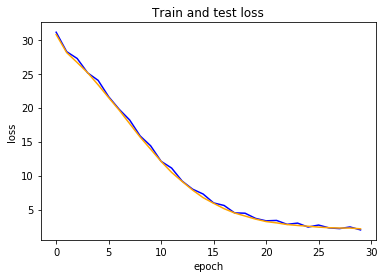

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.title('Train and test loss')
plt.plot(loss_df['Train Loss'], color='blue', label='train')
plt.plot(loss_df['Test Loss'], color='orange', label='test')
filename = 'self_driving_car'
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig(filename + '_plot.png')
plt.show()
plt.close()

In [ ]:
## from run.py

In [19]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save_model/self_driving_car_model_new.ckpt")

print('press q to quit')

predicted_degrees = []
img = cv2.imread('steering_wheel_image.png', 0) 
rows, cols = img.shape

i = 0
while(cv2.waitKey(30) != ord("q")):
    full_image = cv2.imread(test_x[i])
    cv2.imshow('Frame Window', full_image)
    image = ((cv2.resize(full_image[-150:], (200, 66)) / 255.0).reshape((1, 66, 200, 3)))
    degrees = sess.run(y_predicted, feed_dict = {x_input: image, keep_prob: 1.0})[0][0] *180 / pi 
    #predicted degrees from radians to degrees.
    #print("Predicted degrees: "+str(degrees))
    predicted_degrees.append(degrees)
    M = cv2.getRotationMatrix2D((cols/2,rows/2), -degrees, 1) 
    dst = cv2.warpAffine(src = img, M = M, dsize = (cols, rows)) 
    cv2.imshow("Steering Wheel", dst)
    i += 1
    

cv2.destroyAllWindows()

INFO:tensorflow:Restoring parameters from save_model/self_driving_car_model_new.ckpt
press q to quit


### Observations
- The updated model of Sully Chen's is performing and works to some extent but it is not as good as the initial one.
- Modifications to the original implementation: Used linear activation function (ELU) and changed drop out rate of Adam optimizer to 1e-4

- The model may have performed better if it had run for more than 30 epochs.



- Maybe the atan function in the output layer makes a lot of difference in the performance.
 
- Maybe the lower performance is due to the `learning rate` and `dropout` rate changes.

